**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Aprendizaje Automático**

***
Datos del alumno (Nombre y Apellidos): Jose Manuel Pinillos Rubio

Fecha: 11 de diciembre de 2024
***

# <span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Regresión lineal y árboles de decisión para tareas de regresión</span>

## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.

## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.

### 1. Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [ ]:
!pip3 install -U ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Este código instala la biblioteca `ucimlrepo`, que permite acceder a conjuntos de datos del repositorio UCI Machine Learning. A continuación, importa las funciones y bibliotecas necesarias para el análisis:

- `fetch_ucirepo` para descargar *datasets* directamente desde el repositorio UCI.
- `pandas` y `numpy` para manipulación, organización y análisis de datos, proporcionando estructuras como DataFrames y herramientas matemáticas.
- `matplotlib.pyplot` y `seaborn` para crear gráficos y visualizaciones avanzadas, facilitando la comprensión visual de los datos.

Este conjunto de herramientas es esencial para realizar análisis exploratorios, transformaciones y representaciones gráficas del *dataset*, permitiendo abordar de manera integral las tareas de *machine learning* y análisis de datos.

#### 1.1 - Cargar el dataset

In [ ]:
# Descargamos el dataset Air Quality del repositorio UCI
air_quality = fetch_ucirepo(id=360)

# Convertimos las características del dataset en un DataFrame de pandas
air_quality_df = pd.DataFrame(data=air_quality.data.features)

# Mostramos las 5 primeras filas del DataFrame
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


Se descarga el *dataset* **Air Quality** del repositorio UCI y se convirte en un *dataset* de pandas. A continuación, se visualizan las 5 primeras filas del conjunto de datos utilizando el método `.head()`, que permite mostrar, por defecto, las primeras 5 filas de un *dataset*. Esto es útil para comprobar que el *dataset* se ha cargado correctamente y verificar la estructura de los datos, como el nombre de las columnas y el tipo de datos.

In [ ]:
# Extraemos los metadatos del dataset y los guardamos en una estructura aparte
air_quality_metadata = air_quality.variables

# Mostramos los metadatos del dataset
air_quality_metadata

,name,role,type,demographic,description,units,missing_values
0,Date,Feature,Date,None,None,None,no
1,Time,Feature,Categorical,None,None,None,no
2,CO(GT),Feature,Integer,None,True hourly averaged concentration CO in mg/m^...,mg/m^3,no
3,PT08.S1(CO),Feature,Categorical,None,hourly averaged sensor response (nominally CO...,None,no
4,NMHC(GT),Feature,Integer,None,True hourly averaged overall Non Metanic Hydro...,microg/m^3,no
5,C6H6(GT),Feature,Continuous,None,True hourly averaged Benzene concentration in...,microg/m^3,no
6,PT08.S2(NMHC),Feature,Categorical,None,hourly averaged sensor response (nominally NMH...,None,no
7,NOx(GT),Feature,Integer,None,True hourly averaged NOx concentration in ppb...,ppb,no
8,PT08.S3(NOx),Feature,Categorical,None,hourly averaged sensor response (nominally NOx...,None,no
9,NO2(GT),Feature,Integer,None,True hourly averaged NO2 concentration in micr...,microg/m^3,no


En este fragmento, se extraen los metadatos del *dataset* utilizando el atributo variables del objeto air_quality. Estos metadatos incluyen información relevante sobre las columnas del *dataset*, como sus tipos (categóricas, continuas, etc.), descripciones, unidades de medida y valores faltantes. La información se almacena en la variable air_quality_metadata para tenerla accesible de forma separada.

Luego, se visualiza el contenido de air_quality_metadata, lo que permite examinar los detalles adicionales del *dataset* que no están presentes en el *dataset* principal (air_quality_df). Este paso es fundamental para entender mejor el significado de los datos y realizar análisis adecuados.

#### 1.2 - ¿Cuántas instancias tiene el dataset?

In [ ]:
# Obtenemos el número de instancias (filas) del dataset
instances = air_quality_df.shape[0]

# Mostramos el número de instancias
print(f"El dataset tiene {instances} instancias.")

El dataset tiene 9357 instancias.


Se utiliza `shape[0]` para obtener el número de filas (instancias) del *dataset*, y se imprimie el resultado. El *dataset* tiene 9357 instancias, lo que indica la cantidad total de registros en los datos.

#### 1.3 - ¿Cuál es el tipo de datos de cada una de las columnas?

In [ ]:
# Comprobamos el tipo de datos de cada columna
air_quality_df.dtypes

,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),int64
NMHC(GT),int64
C6H6(GT),float64
PT08.S2(NMHC),int64
NOx(GT),int64
PT08.S3(NOx),int64
NO2(GT),int64


Se utiliza el atributo `.dtypes` de pandas para obtener el tipo de datos de cada columna en el *dataset*. Este atributo devuelve una serie donde cada columna está asociada a su tipo de dato.

##### Resultado:

- object: Datos categóricos o de texto (como Date y Time).
- float64: Datos numéricos con decimales (como CO(GT) y T).
- int64: Datos numéricos enteros (como PT08.S1(CO) y NOx(GT)).

#### 1.4 - ¿Cuántas columnas categóricas hay? ¿y cuántas continuas?

In [ ]:
# Identificamos columnas categóricas (tipo object)
categorical_col = air_quality_df.select_dtypes(include='object').columns

# Identificamos columnas continuas (numéricas)
continuous_col = air_quality_df.select_dtypes(include=['int64', 'float64']).columns

# Mostramos los resultados
print(f"Columnas categóricas: {len(categorical_col)}")
print(f"Columnas continuas: {len(continuous_col)}")

Columnas categóricas: 2
Columnas continuas: 13


El código utiliza la función `select_dtypes` de pandas para identificar las columnas categóricas y continuas del *dataset*. En primer lugar, se seleccionan las columnas de tipo `object`, que suelen contener datos categóricos como texto o fechas, y se almacenan en la variable `categorical_col`. Posteriormente, se seleccionan las columnas con tipos de datos numéricos (`int64` y `float64`), que representan datos continuos, y se guardan en la variable `continuous_col`.

La lógica nos dice que, al analizar un *dataset*, es habitual clasificar como categóricas las columnas de tipo texto o fechas (`object`) y como continuas aquellas con valores numéricos (`int64`, `float64`) que representan mediciones o cantidades. Este enfoque rápido permite una clasificación básica basada únicamente en los tipos de datos almacenados.

Los resultados obtenidos muestran que hay **2 columnas categóricas** en el *dataset*, las cuales corresponden a `Date` y `Time`. Estas columnas contienen información de fechas y horas en formato texto. Además, se identificaron **13 columnas continuas**, que contienen valores numéricos y representan mediciones reales como concentraciones de gases y variables ambientales.

In [ ]:
# Extraemos los metadatos del dataset
column_types = air_quality_metadata[['name', 'type']]  # 'name' contiene los nombres, 'type' los tipos

# Contamos columnas categóricas y continuas según los metadatos
categorical_cols = column_types[column_types['type'] == 'Categorical']['name']
continuous_cols = column_types[column_types['type'] == 'Continuous']['name']

# Mostramos los resultados
print(f"Columnas categóricas: {len(categorical_cols)} -> {list(categorical_cols)}")
print(f"Columnas continuas: {len(continuous_cols)} -> {list(continuous_cols)}")

Columnas categóricas: 6 -> ['Time', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
Columnas continuas: 4 -> ['C6H6(GT)', 'T', 'RH', 'AH']


En este enfoque, se utiliza la información extraída de los metadatos (`air_quality_metadata`) para identificar las columnas categóricas y continuas de manera más precisa. Los metadatos proporcionan información adicional sobre las características del *dataset*, como descripciones, unidades y clasificaciones originales, que no se ven afectadas por cómo los datos fueron cargados.

Para ser más precisos y fieles al *dataset* original, el enfoque adecuado sería este, ya que garantiza que las columnas sean clasificadas tal como fueron definidas por los creadores del *dataset*. Esto elimina cualquier posible discrepancia generada por conversiones automáticas de tipos de datos durante la importación. Este enfoque asegura que la clasificación refleje la intención original del diseño del *dataset*, permitiendo un análisis más riguroso y alineado con la realidad de los datos.

#### 1.5 - ¿Existen valores nulos en el dataset?

In [ ]:
# Calculamos el número de valores nulos por columna
null_values = air_quality_df.isnull().sum()

# Mostramos las columnas con sus respectivos valores nulos
print(null_values)

# Verificamos si existe al menos un valor nulo en todo el dataset
if air_quality_df.isnull().any().any():
  print("\nExisten valores nulos en el dataset.")
else:
  print("\nNo existen valores nulos en el dataset.")

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

No existen valores nulos en el dataset.


El código verifica la presencia de valores nulos en el dataset en dos pasos. En primer lugar, se utiliza la combinación de los métodos **`isnull()`** y **`sum()`**. El método `isnull()` evalúa cada celda del dataset y devuelve `True` si el valor es nulo y `False` si no lo es. Posteriormente, el método `sum()` cuenta cuántos valores nulos hay en cada columna al sumar los `True` (que se interpretan como `1`), devolviendo una lista con el total de valores nulos por columna.

En segundo lugar, para comprobar si existe al menos un valor nulo en todo el dataset, se utiliza **`any().any()`**. La primera llamada a `any()` revisa cada columna y devuelve `True` si alguna celda contiene un valor nulo. La segunda llamada a `any()` evalúa si alguno de esos resultados es `True`, lo que indica la presencia de al menos un valor nulo en el dataset. Si existen valores nulos, se muestra un mensaje afirmándolo junto con la cantidad total; de lo contrario, se informa que no hay valores nulos.

Al ejecutar el código, se observa que todas las columnas tienen **0 valores nulos**. Sin embargo, la información adicional del conjunto de datos indica que **los valores perdidos están etiquetados con un valor de `-200`**. Por lo tanto, podemos considerar los valores **`-200`** como **nulos**, ya que representan datos faltantes de manera explícita. Aunque no se encuentran en formato `NaN` estándar de pandas, su significado es equivalente a "valor perdido".

In [ ]:
# Filtramos las columnas numéricas (int64 y float64)
numeric_cols = air_quality_df.select_dtypes(include=['int64', 'float64']).columns

# Reemplazamos "-200" por pd.NA
air_quality_df.replace(-200, pd.NA, inplace=True)

# Aplicamos pd.to_numeric únicamente a las columnas filtradas
air_quality_df[numeric_cols] = air_quality_df[numeric_cols].apply(pd.to_numeric)

# Verificamos los tipos de datos después de la conversión
air_quality_df.dtypes

,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


El código comienza filtrando las columnas numéricas (`int64` y `float64`) para asegurar que solo estas sean procesadas en los pasos siguientes. Posteriormente, se reemplazan los valores **-200** por nulos estándar (`pd.NA`) en todo el dataset. Este reemplazo permite identificar de manera uniforme los datos faltantes, pero provoca que las columnas numéricas pasen a ser interpretadas como objetos (`object`), ya que `pd.NA` no es compatible con el tipo `int64`.

Para corregir esto, se aplica el método `pd.to_numeric` exclusivamente a las columnas numéricas previamente filtradas. Este paso garantiza que las columnas se conviertan de nuevo a su tipo numérico adecuado, en este caso, `float64`. Es importante notar que la conversión a `float64` no afecta negativamente al análisis, ya que los valores originales (incluso si eran enteros) se conservan, con la posibilidad de manejar también valores decimales y nulos (`NaN`).

Este paso es esencial como preparación para el cálculo y análisis de valores nulos, asegurando que el dataset esté correctamente estructurado y listo para operaciones estadísticas y gráficas.

In [ ]:
# Calculamos el número de valores nulos en cada columna
null_values = air_quality_df.isnull().sum()

# Mostramos las columnas con sus respectivos valores nulos
print(null_values)

# Verificamos si existe al menos un valor nulo en todo el dataset y mostramos el total
if air_quality_df.isnull().any().any():
  print(f"Existen {null_values.sum()} valores nulos en el dataset.")
else:
  print("No existen valores nulos en el dataset.")

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
Existen 16701 valores nulos en el dataset.


El código calcula el número de valores nulos en cada columna utilizando **`isnull().sum()`**. El método **`isnull()`** evalúa cada celda del *dataset* y devuelve `True` si el valor es nulo (ahora `pd.NA`) y `False` si no lo es. Luego, el método **`sum()`** cuenta cuántos valores `True` (equivalentes a 1) existen en cada columna, devolviendo el total de nulos por columna.

Por último, se verifica si existe **al menos un valor nulo** en el *dataset* utilizando **`any().any()`**. La primera llamada a `any()` comprueba si alguna celda es nula en cada columna, mientras que la segunda llamada evalúa si alguna de las columnas contiene valores nulos. Si se encuentran valores nulos, se imprime un mensaje indicando que existen datos faltantes y el **total acumulado** de nulos en el *dataset*, calculado con **`null_values.sum()`**.

Al ejecutar el código sobre el *dataset*, se obtiene que varias columnas tienen valores nulos. Por ejemplo:
- `CO(GT)` tiene **1683 valores nulos**.  
- `NMHC(GT)` tiene **8443 valores nulos**, siendo la columna con más datos faltantes.  
- Otras columnas, como `C6H6(GT)` y `T`, tienen **366 valores nulos**.  

En total, el *dataset* contiene **16701 valores nulos**, lo cual representa una cantidad significativa de datos faltantes.

#### 1.6 - ¿Cuál es la variable respuesta? ¿de qué tipo es?

Tras estudiar el dataset y la documentación proporcionada, se toma la decisión de seleccionar las variables respuesta basándose en su relevancia para el análisis. Las concentraciones de CO, NMHC, NOx, NO2 y benceno son identificadas como indicadores clave de la contaminación atmosférica, lo que las hace altamente relevantes para cualquier modelo relacionado con la calidad del aire. El objetivo del análisis en este dataset es predecir las concentraciones reales de contaminantes atmosféricos utilizando los datos obtenidos de los sensores químicos como variables predictoras.

Estas variables están identificadas como mediciones realizadas por un **analizador certificado de referencia**, lo que indica que son valores confiables y precisos, considerados como la **"verdad base" o ground truth** del sistema. Por tanto, se seleccionan como variables respuesta:

- **CO(GT)**: Concentración de monóxido de carbono (CO) en mg/m³.
- **NMHC(GT)**: Concentración de hidrocarburos no metánicos (NMHC) en µg/m³.
- **C6H6(GT)**: Concentración de benceno (C6H6) en µg/m³.
- **NOx(GT)**: Concentración de óxidos de nitrógeno (NOx) en ppb.
- **NO2(GT)**: Concentración de dióxido de nitrógeno (NO2) en µg/m³.

Por otro lado, las variables **PT08.S1(CO)**, **PT08.S2(NMHC)**, **PT08.S3(NOx)**, **PT08.S4(NO2)** y **PT08.S5(O3)** no representan las concentraciones reales, sino las **estimaciones generadas por los sensores químicos**. Estas variables se utilizan como **predictoras**, ya que son respuestas indirectas de los sensores diseñados para estimar las concentraciones reales de los contaminantes.

Aunque las variables respuesta seleccionadas contienen valores nulos, se considera que los datos disponibles son suficientes para entrenar un modelo robusto, siempre que se realice un adecuado preprocesamiento. Además, los valores presentes muestran una distribución continua y coherente, como se observa en las primeras filas del dataset, lo que refuerza su idoneidad como variables respuesta en el análisis. De esta manera, se diferencian claramente las variables que representan los valores reales de los contaminantes de aquellas que actúan como estimaciones aproximadas generadas por los sensores.

In [ ]:
# Filtramos las variables cuya descripción contiene la palabra "True"
# Esto identifica las variables relacionadas con mediciones reales (ground truth)
variable_respuesta = air_quality_metadata[
  air_quality_metadata['description'].str.contains('True', case=False, na=False)
]

# Creamos un DataFrame temporal con los tipos reales de datos del DataFrame
data_types = air_quality_df.dtypes.reset_index()
data_types.columns = ['name', 'real_type']

# Unimos los metadatos filtrados con los tipos reales de las variables
variable_respuesta = variable_respuesta.merge(data_types, on='name', how='left')

# Mostramos las columnas de interés: nombre, tipo declarado en los metadatos y tipo real
variable_respuesta[['name', 'type', 'real_type']]

,name,type,real_type
0,CO(GT),Integer,float64
1,NMHC(GT),Integer,float64
2,C6H6(GT),Continuous,float64
3,NOx(GT),Integer,float64
4,NO2(GT),Integer,float64


El código identifica las variables respuesta del *dataset* utilizando los metadatos y los tipos de datos reales almacenados en el *dataset*. En primer lugar, se filtran las variables cuya descripción contiene la palabra **"True"**. Esto se hace porque, en el contexto del *dataset*, las mediciones de referencia (ground truth) se describen como "True hourly averaged", lo que permite identificarlas como las variables que representan las concentraciones reales de contaminantes.

A continuación, se crea un DataFrame temporal llamado `data_types` para obtener los tipos reales de datos almacenados en el *dataset*. Este proceso utiliza el atributo `dtypes`, que indica si las variables son de tipo `int64`, `float64`, `object`, etc. Los nombres de las variables y sus tipos se estructuran en dos columnas: `name` y `real_type`.

Finalmente, se combinan los metadatos filtrados con los tipos reales de las variables utilizando el método `merge`. Esto asegura que, además de conocer las descripciones de las variables desde los metadatos, también se dispone del tipo real de cada variable según el *dataset* cargado. Este enfoque es útil porque el tipo declarado en los metadatos (`type`) no siempre coincide con el tipo real almacenado en el *dataset*.

El resultado muestra las columnas clave: el nombre de la variable (`name`), el tipo declarado en los metadatos (`type`) y el tipo real de dato (`real_type`). Esto permite comparar la información proporcionada por los metadatos con la estructura real de los datos en el *dataset*.

#### 1.7 - Si te fijas en los estadísticos del *dataset*, ¿cómo es la distribución de las variables, CO, NOx y NO2?

In [ ]:
air_quality_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe()

,CO(GT),NOx(GT),NO2(GT)
count,7674.000000,7718.000000,7715.000000
mean,2.152750,246.896735,113.091251
std,1.453252,212.979168,48.370108
min,0.100000,2.000000,2.000000
25%,1.100000,98.000000,78.000000
50%,1.800000,180.000000,109.000000
75%,2.900000,326.000000,142.000000
max,11.900000,1479.000000,340.000000


Primero, se utiliza el método **`describe()`** para las variables **CO(GT)**, **NOx(GT)** y **NO2(GT)**, obteniendo los estadísticos descriptivos básicos. Estos incluyen medidas como la media, la mediana (50%), los cuartiles (25% y 75%) y los valores extremos (mínimo y máximo). Estos estadísticos permiten analizar las características generales de la distribución de las variables.

Los resultados muestran que **NOx(GT)** parece tener un **sesgo positivo**, ya que la media (246.89) es significativamente mayor que la mediana (180.0). Esto sugiere que los valores altos están influyendo en la distribución, desplazándola hacia la derecha. Además, el valor máximo (1479.0) es considerablemente mayor que el cuartil superior (326.0), lo que refuerza la idea de la presencia de un sesgo positivo y posibles valores extremos.

En cuanto a **CO(GT)**, la media (2.15) es ligeramente mayor que la mediana (1.8), lo que podría sugerir un **leve sesgo positivo**. Sin embargo, la diferencia no es tan pronunciada como en **NOx(GT)**, y los datos parecen estar algo más concentrados alrededor de la mediana. Aunque el máximo (11.9) es notablemente alto, no tiene un impacto significativo en la distribución general.

Por último, **NO2(GT)** muestra una distribución **prácticamente simétrica**, ya que la media (113.09) y la mediana (109.0) están muy cercanas. Esto indica que los valores están equilibrados a ambos lados del centro de la distribución. Aunque el máximo (340.0) es alto, no parece afectar significativamente la tendencia central de los datos.

In [ ]:
# Calculamos Q1 (25%) y Q3 (75%) para las tres variables
q1 = air_quality_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].quantile(0.25)
q3 = air_quality_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].quantile(0.75)

# Calculamos el RIC
ric = q3 - q1

# Mostramos el resultado
ric

,0
CO(GT),1.8
NOx(GT),228.0
NO2(GT),64.0


Tras calcular el **RIC**, se observa que **CO(GT)** tiene los datos **muy concentrados**, ya que su rango intercuartílico (1.8) es pequeño, lo que indica poca dispersión en el 50 % central de los datos. Esto refuerza la idea de que la distribución de CO es compacta y solo presenta un leve sesgo positivo.

Por otro lado, **NO2(GT)** muestra datos **algo dispersos** pero cercanos a la mediana, como lo refleja su RIC moderado (64.0). Esto coincide con la observación de que **NO2** tiene una distribución prácticamente simétrica y equilibrada.

En cambio, **NOx(GT)** presenta datos **muy dispersos y superiores a la mediana**, con un RIC alto (228.0) que evidencia una gran variabilidad en el rango central. Esto, combinado con la media significativamente mayor que la mediana, confirma un **sesgo positivo pronunciado**, como se concluyó previamente.

Estos resultados del RIC complementan y refuerzan las conclusiones anteriores, ofreciendo un análisis más sólido de la dispersión y forma de las distribuciones de las variables.

In [ ]:
# calculamos los mínimos y los máximos
min_values = air_quality_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].min()
max_values = air_quality_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].max()

# Calculamos los límites
lower_limit = q1 - 1.5 * ric
upper_limit = q3 + 1.5 * ric

# Creamos un dataset con los resultados
limits = pd.DataFrame({
  'Min': min_values,
  'Max': max_values,
  'Límite Inferior': lower_limit,
  'Límite Superior': upper_limit
})

# Mostramos la tabla
limits

,Min,Max,Límite Inferior,Límite Superior
CO(GT),0.1,11.9,-1.6,5.6
NOx(GT),2.0,1479.0,-244.0,668.0
NO2(GT),2.0,340.0,-18.0,238.0


El código calcula los valores mínimos y máximos, además de los límites superior e inferior utilizando el **RIC**. Seguidamente, se crea un **dataset** con estos valores para mostrarlos en forma de tabla y facilitar su análisis.

Tras el análisis, se observa que las tres variables mantienen sus valores mínimos dentro del rango definido por el límite inferior. Esto nos permite descartar la presencia de **outliers inferiores**, ya que todos los valores en el extremo bajo de las distribuciones están dentro del rango esperado.

Por otro lado, los valores máximos de las tres variables están por encima del límite superior, lo que confirma la presencia de **outliers superiores**. Estos valores atípicos son más evidentes en las variables **NOx(GT)** y **CO(GT)**, donde la distancia entre el máximo y el límite superior es considerable. En el caso de **NO2(GT)**, aunque también existen outliers superiores, estos son menos pronunciados.

#### 1.8 - ¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

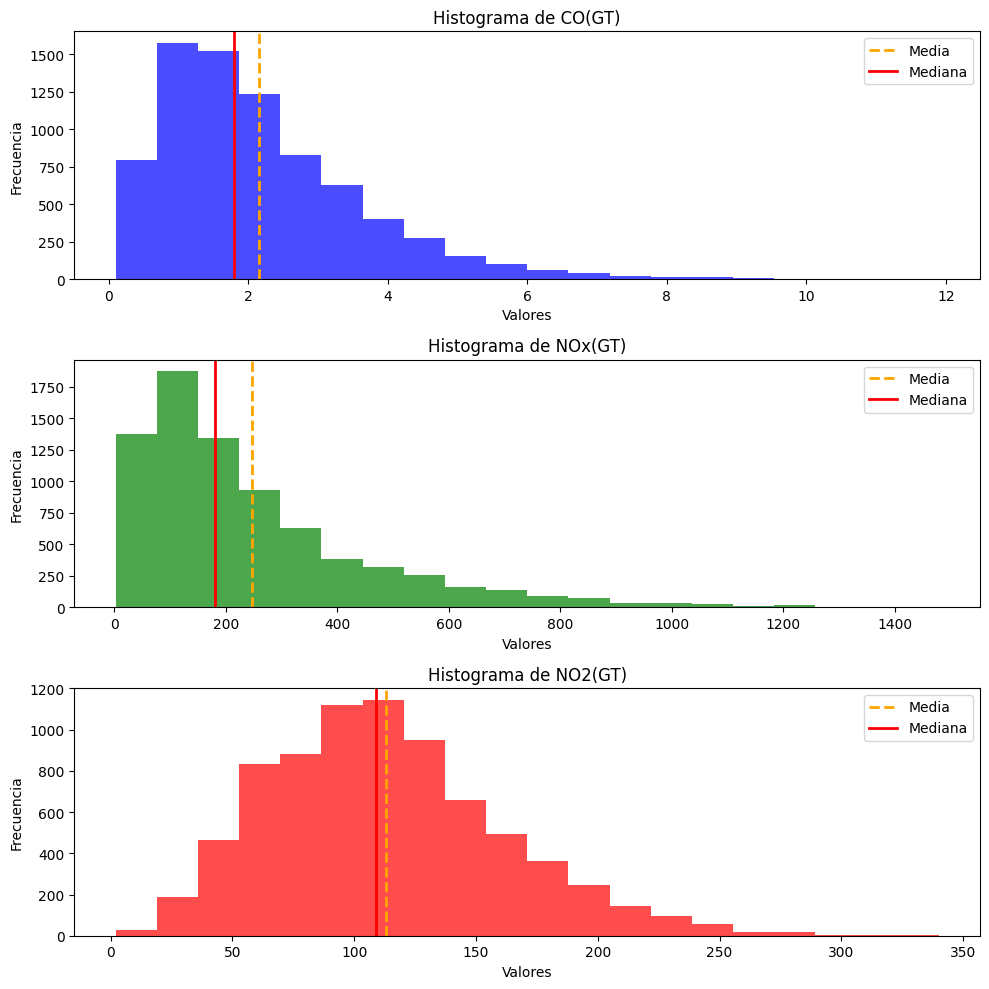

In [ ]:
# Creamos histogramas independientes con media y mediana
plt.figure(figsize=(10, 10))

# Histograma para CO(GT)
plt.subplot(3, 1, 1)
plt.hist(air_quality_df['CO(GT)'].dropna(), bins=20, color='blue', alpha=0.7)
plt.axvline(np.mean(air_quality_df['CO(GT)'].dropna()), color='orange', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(np.median(air_quality_df['CO(GT)'].dropna()), color='red', linestyle='solid', linewidth=2, label='Mediana')
plt.title('Histograma de CO(GT)')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para NOx(GT)
plt.subplot(3, 1, 2)
plt.hist(air_quality_df['NOx(GT)'].dropna(), bins=20, color='green', alpha=0.7)
plt.axvline(np.mean(air_quality_df['NOx(GT)'].dropna()), color='orange', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(np.median(air_quality_df['NOx(GT)'].dropna()), color='red', linestyle='solid', linewidth=2, label='Mediana')
plt.title('Histograma de NOx(GT)')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para NO2(GT)
plt.subplot(3, 1, 3)
plt.hist(air_quality_df['NO2(GT)'].dropna(), bins=20, color='red', alpha=0.7)
plt.axvline(np.mean(air_quality_df['NO2(GT)'].dropna()), color='orange', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(np.median(air_quality_df['NO2(GT)'].dropna()), color='red', linestyle='solid', linewidth=2, label='Mediana')
plt.title('Histograma de NO2(GT)')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostramos los resultados
plt.tight_layout()
plt.show()

Los histogramas generados permiten confirmar y complementar los resultados obtenidos previamente en el análisis numérico, añadiendo una perspectiva visual clave para entender la distribución de los datos.

En el caso de **CO(GT)**, se observa que la media está ligeramente desplazada hacia la derecha respecto a la mediana. Este comportamiento confirma un **leve sesgo positivo**, ya que los valores más altos están influyendo en la media, pero de forma moderada. El histograma también muestra que la mayoría de los datos están concentrados en el rango más bajo, alrededor de valores cercanos a 0, lo que refuerza la idea de que esta variable tiene una dispersión relativamente baja. Además, la gráfica evidencia una **asimetría hacia la derecha**, ya que la cola de la distribución se extiende más hacia valores altos, indicando que los valores extremos están en ese extremo.

Para **NOx(GT)**, el desplazamiento entre la media y la mediana es mucho más evidente, lo que confirma la presencia de un **sesgo positivo pronunciado**. Este comportamiento es causado por los valores extremos, o outliers superiores, que desplazan la media hacia valores más altos. El histograma muestra una gran concentración de valores en los rangos bajos, entre 0 y 200, mientras que la cola derecha es larga, extendiéndose hasta valores muy altos. Esta gráfica también es claramente **asimétrica hacia la derecha**, con un sesgo positivo marcado, consistente con las observaciones numéricas y visuales previas.

En el caso de **NO2(GT)**, aunque en el análisis numérico inicial parecía tener una distribución casi simétrica, el histograma revela un **ligero sesgo positivo**. Esto se refleja en la pequeña diferencia entre la media y la mediana, con la media desplazada hacia la derecha. Sin embargo, este sesgo es mucho menos pronunciado que en NOx(GT). El histograma muestra una distribución más equilibrada, con los datos bien distribuidos alrededor de la mediana y menos influencia de valores extremos. Aunque es casi simétrica, presenta una **ligera asimetría hacia la derecha**, indicando un sesgo positivo moderado.

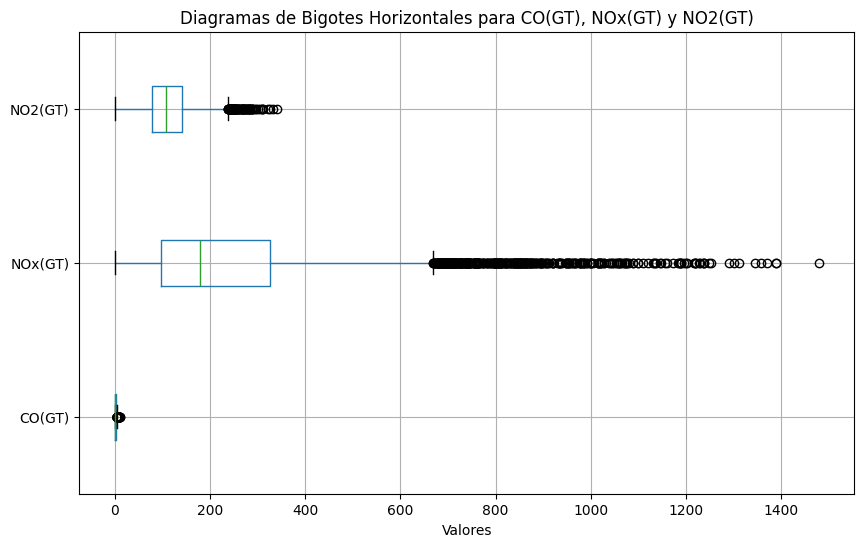

In [ ]:
# Creamos el diagrama de bigotes en horizontal
plt.figure(figsize=(10, 6))
air_quality_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].boxplot(vert=False)
plt.title("Diagramas de Bigotes Horizontales para CO(GT), NOx(GT) y NO2(GT)")
plt.xlabel("Valores")
plt.show()

Los diagramas de caja y bigotes confirman visualmente los límites y outliers identificados en la pregunta 1.7. Para CO(GT), su rango intercuartílico estrecho refleja baja dispersión, y los valores superiores al límite de 5.6 aparecen claramente como outliers. En NOx(GT), el rango intercuartílico amplio (228.0) y los numerosos valores extremos por encima del límite de 668.0 refuerzan su alta dispersión y sesgo positivo. Por último, en NO2(GT), aunque el rango intercuartílico es más moderado (64.0), los outliers superiores, por encima del límite de 238.0, son menos significativos, confirmando su distribución más controlada.

##### Conclusiones:

Como se observa en las distintas fases del estudio de los estadísticos realizados en las preguntas 1.7 y 1.8, se puede concluir que combinar el análisis gráfico con las medidas estadísticas resulta esencial para obtener una comprensión más completa de los datos. Mientras que los cálculos numéricos proporcionan una base cuantitativa sólida para describir las tendencias centrales, la dispersión y el sesgo, los gráficos añaden un contexto visual. Este enfoque visual facilita la interpretación de los resultados, revelando aspectos de las distribuciones, como la forma, la asimetría y la presencia de outliers, que pueden no ser evidentes solo con los valores numéricos. Además, permite realizar comparaciones más intuitivas entre variables y validar de manera clara las conclusiones obtenidas a través de los estadísticos descriptivos.

In [ ]:
# Seleccionamos un subconjunto del dataset que contiene las variables CO(GT), NOx(GT) y NO2(GT).
variables = air_quality_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']]

# Iteramos sobre los nombres de las columnas seleccionadas.
for variable in variables.columns:
  # Calculamos el porcentaje de valores nulos en la columna actual.
  percentaje = (null_values[variable] * 100) / instances

  # Imprimimos el nombre de la columna y el porcentaje de valores nulos calculado.
  print(f"{variable} tiene {percentaje}% de valores nulos.")

CO(GT) tiene 17.986534145559474% de valores nulos.
NOx(GT) tiene 17.51629795874746% de valores nulos.
NO2(GT) tiene 17.54835951693919% de valores nulos.


En cuanto a los datos faltantes, se identificó que las tres variables analizadas contienen valores nulos que representan aproximadamente el 17-18 % del total de registros. Estos datos faltantes fueron previamente etiquetados como -200 y tratados como valores nulos estándar (`pd.NA`) para asegurar que no influyeran en los cálculos de estadísticos descriptivos, como la media, la mediana o el rango intercuartílico (RIC).

Para calcular el porcentaje de valores nulos en cada variable, se seleccionaron las columnas de interés (**CO(GT)**, **NOx(GT)** y **NO2(GT)**) y se recorrieron en un bucle. En cada iteración, el número de valores nulos para la variable actual se multiplicó por 100 y se dividió entre el total de instancias del *dataset* para obtener el porcentaje. Finalmente, se imprimió el nombre de cada variable junto con su respectivo porcentaje de valores nulos.

Aunque estos valores no afectaron a los análisis numéricos ni gráficos realizados hasta ahora, es crucial tenerlos en cuenta para las siguientes etapas del estudio, debido a que su proporción podría impactar en la representatividad de los resultados, especialmente en la calidad del entrenamiento de modelos predictivos.

#### 1.9 - ¿Cómo son las correlaciones entre las variables del dataset?

In [ ]:
# Seleccionamos solo las columnas numéricas relevantes (excluyendo Date y Time)
relevant_numeric_cols = air_quality_df.select_dtypes(include=['float64', 'int64']).columns

# Calculamos la matriz de correlación para las columnas relevantes
correlation_matrix = air_quality_df[relevant_numeric_cols].corr()

# Mostramos la matriz de correlación
correlation_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.879288,0.889734,0.931078,0.915514,0.795028,-0.703446,0.683343,0.630703,0.854182,0.022109,0.048890,0.048556
PT08.S1(CO),0.879288,1.000000,0.790670,0.883795,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.889734,0.790670,1.000000,0.902559,0.877696,0.812685,-0.771135,0.731193,0.853267,0.766723,0.391587,-0.191454,0.269738
C6H6(GT),0.931078,0.883795,0.902559,1.000000,0.981950,0.718839,-0.735744,0.614474,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.915514,0.892964,0.877696,0.981950,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.795028,0.713654,0.812685,0.718839,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,-0.269683,0.221032,-0.149323
PT08.S3(NOx),-0.703446,-0.771938,-0.771135,-0.735744,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.683343,0.641529,0.731193,0.614474,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.186533,-0.091759,-0.335022
PT08.S4(NO2),0.630703,0.682881,0.853267,0.765731,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.854182,0.899324,0.766723,0.865689,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,-0.027172,0.124956,0.070751


El análisis de la matriz de correlación muestra que las variables ambientales, como la temperatura (**T**), la humedad relativa (**RH**) y la humedad absoluta (**AH**), tienen poca o ninguna relación con la mayoría de las otras variables del *dataset*. **RH** no presenta correlación significativa con ninguna variable, lo que sugiere que su influencia en los contaminantes o sensores es mínima. **T** y **AH**, aunque no tienen correlaciones destacables con la mayoría de las variables, están moderadamente relacionadas entre sí con una correlación positiva de 0.656, lo que refleja una conexión física entre la temperatura y la capacidad del aire para retener humedad. En general, estas variables parecen independientes del resto del *dataset*.

**CO(GT)** tiene correlaciones positivas fuertes con varias variables clave, como **PT08.S1(CO)** (0.879), **NMHC(GT)** (0.889), **C6H6(GT)** (0.931), **PT08.S2(NMHC)** (0.915), **NOx(GT)** (0.795) y **PT08.S5(O3)** (0.854). Esto indica que estas variables, tanto sensores como contaminantes, están asociadas con fuentes comunes, principalmente procesos de combustión.

**NOx(GT)** también muestra correlaciones positivas significativas con **NMHC(GT)** (0.812), **NO2(GT)** (0.763) y **PT08.S5(O3)** (0.787), lo que señala que estas variables comparten una misma fuente o proceso, probablemente emisiones de vehicuos. Además, tiene una correlación negativa moderada con **PT08.S3(NOx)** (-0.655), lo que podría reflejar una relación inversa debido a la naturaleza indirecta de este sensor.

En cuanto a **NO2(GT)**, existe una correlación positiva fuerte con **NOx(GT)** (0.763), como se esperaba debido a su conexión química, y una correlación menor con **PT08.S4(NO2)** (0.157), lo que indica que este sensor puede no capturar la concentración de NO2 de manera precisa o estar afectado por interferencias.

Los sensores químicos (**PT08.S1** a **PT08.S5**) presentan correlaciones positivas fuertes entre sí, como **PT08.S1(CO)** y **PT08.S2(NMHC)** (0.893), o **PT08.S2(NMHC)** y **PT08.S5(O3)** (0.881). Estas relaciones destacan posibles sensibilidades cruzadas entre los sensores, que podrían influir en su capacidad para medir contaminantes de manera independiente.

En general, las variables respuesta (**CO(GT)**, **NOx(GT)**, **NO2(GT)**) tienen relaciones positivas destacadas con sus sensores específicos, lo que confirma su utilidad como predictores.

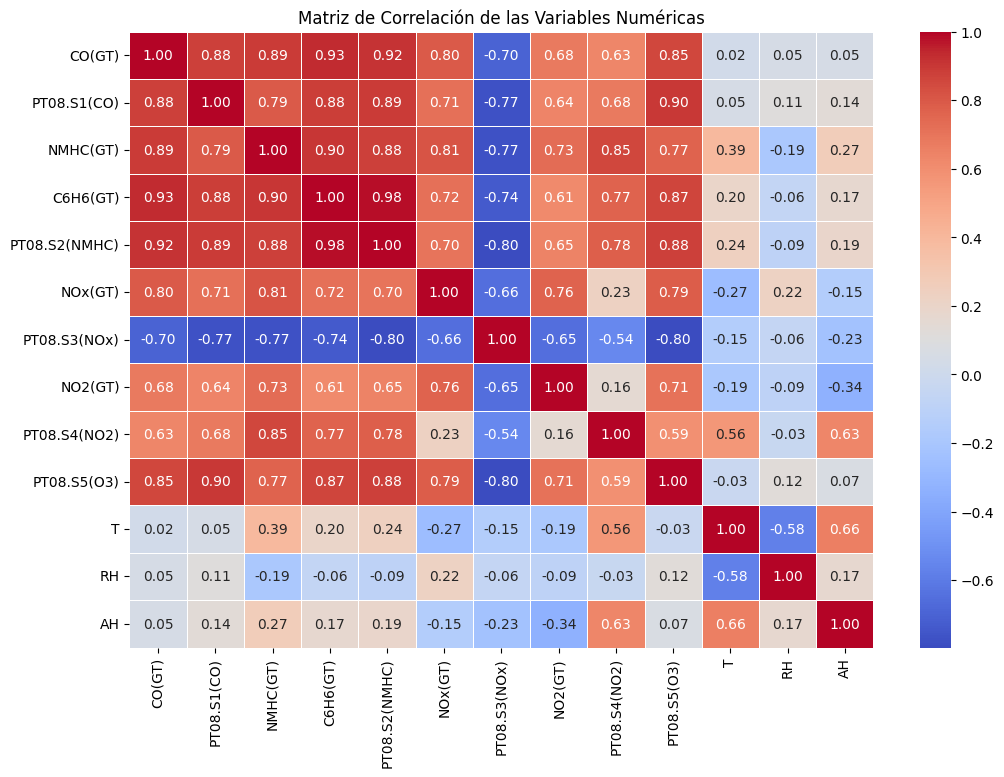

In [ ]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creamos un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Título y visualizacion de la gráfica
plt.title("Matriz de Correlación de las Variables Numéricas")
plt.show()

La matriz de correlación presentada en forma gráfica permite observar de manera visual las relaciones entre las variables numéricas del dataset. Los tonos cálidos (hacia el rojo) representan correlaciones positivas fuertes, mientras que los tonos fríos (hacia el azul) indican correlaciones negativas. Las correlaciones cercanas a 0, que representan una relación débil o nula entre las variables, se muestran en tonos neutros.

#### 1.10 - ¿Qué tres variables son las más correlacionadas con la variable objetivo?

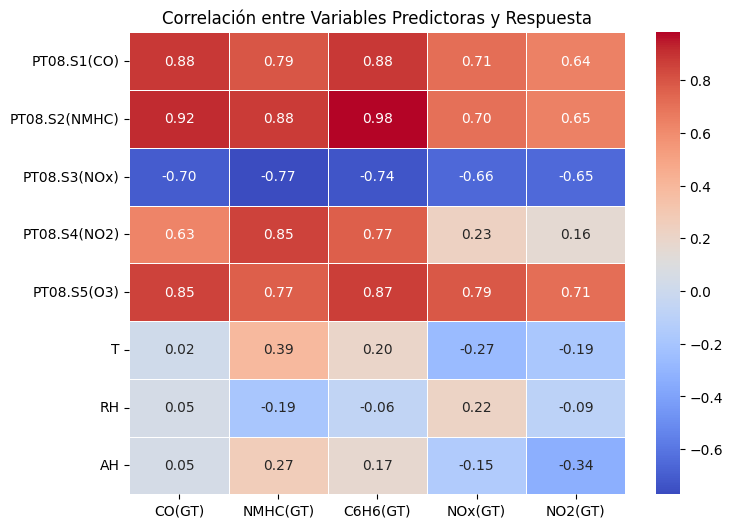

In [ ]:
# Variables respuesta
response_vars = variable_respuesta['name'].tolist()

# Creamos una lista vacía para almacenar las variables predictoras
predictor_vars = []

# Iteramos sobre cada columna en relevant_numeric_cols
for col in relevant_numeric_cols:
  # Verificamos si la columna no está en response_vars
  if col not in response_vars:
    # Si la condición se cumple, agregamos la columna a predictor_vars
    predictor_vars.append(col)

# Filtramos la matriz para obtener solo las correlaciones de las variables respuesta con las predictoras
correlation_with_response = correlation_matrix.loc[predictor_vars, response_vars]

# Visualización de la matriz de correlación entre variables Predictoras y Respuesta
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_response, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlación entre Variables Predictoras y Respuesta")
plt.show()

Para responder a esta pregunta, se generará un gráfico que represente la matriz de correlación entre las variables predictoras y las variables respuesta. Este gráfico permite visualizar de manera clara las relaciones entre estas dos categorías de variables, destacando la intensidad y dirección de las correlaciones.

En primer lugar, se definen las variables respuesta obteniendo sus nombres desde la lista previamente calculada, almacenándolos en `response_vars`. Posteriormente, se crea una lista vacía, `predictor_vars`, destinada a contener únicamente las variables predictoras. Para ello, se itera sobre cada columna numérica relevante del *dataset* y, mediante una condición, se excluyen aquellas que pertenecen a las variables respuesta.

Una vez definidas las listas de variables, se filtra la matriz de correlación completa para seleccionar únicamente las filas correspondientes a las variables predictoras y las columnas asociadas a las variables respuesta. Esto asegura que la matriz de correlación resultante solo contenga las relaciones de interés.

Finalmente, se utiliza un mapa de calor (*heatmap*) para representar gráficamente esta matriz de correlación.


El código presentado tiene como objetivo identificar las variables predictoras más correlacionadas con las variables respuesta del *dataset*. En primer lugar, se definen las variables respuesta utilizando `variable_respuesta['name'].tolist()`, que convierte los nombres de estas variables en una lista. Esto permite trabajar fácilmente con las columnas del *dataset* asociadas a las variables objetivo, que en este caso son `CO(GT)`, `NOx(GT)` y `NO2(GT)`.

A continuación, se identifican las variables predictoras. Para ello, se filtran las columnas numéricas del *dataset* mediante `relevant_numeric_cols` y se excluyen las variables respuesta. Este proceso garantiza que únicamente se analicen las relaciones entre las variables predictoras y las respuesta, evitando redundancias en la matriz de correlación.

La matriz de correlación se calcula utilizando el método `.corr()`, que genera un análisis de la relación lineal entre las columnas seleccionadas. Este cálculo cuantifica el grado de asociación lineal entre variables, con valores entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta).

Finalmente, se visualizan los resultados mediante un mapa de calor utilizando `seaborn.heatmap`. Este gráfico muestra la matriz de correlación con colores que varían según la intensidad y el signo de la correlación. Se añade un título descriptivo para facilitar la interpretación de los resultados.


In [ ]:
# Creamos la función para calcular las variables mas correlacionadas
def top_correlations(correlation_matrix, response_vars, n=3):

  top_correlated = {}

  for response_var in response_vars:
    # Seleccionamos las correlaciones de una variable respuesta
    correlations = correlation_matrix[response_var]

    # Ordenamos por valor absoluto de la correlación en orden descendente
    sorted_correlations = correlations.abs().sort_values(ascending=False)

    # Obtenemos las N variables más correlacionadas (excluyendo la variable respuesta)
    top_correlated[response_var] = sorted_correlations.index[:n].tolist()

  return top_correlated

# Aplicamos la función a nuestra matriz de correlación
result = top_correlations(correlation_with_response, response_vars)

# Mostramos los resultados
for response, predictors in result.items():
    print(f"Las {len(predictors)} variables más correlacionadas con {response} son: {', '.join(predictors)}")

Las 3 variables más correlacionadas con CO(GT) son: PT08.S2(NMHC), PT08.S1(CO), PT08.S5(O3)
Las 3 variables más correlacionadas con NMHC(GT) son: PT08.S2(NMHC), PT08.S4(NO2), PT08.S1(CO)
Las 3 variables más correlacionadas con C6H6(GT) son: PT08.S2(NMHC), PT08.S1(CO), PT08.S5(O3)
Las 3 variables más correlacionadas con NOx(GT) son: PT08.S5(O3), PT08.S1(CO), PT08.S2(NMHC)
Las 3 variables más correlacionadas con NO2(GT) son: PT08.S5(O3), PT08.S3(NOx), PT08.S2(NMHC)


El código comienza con la definición de una función llamada `top_correlations`, diseñada para identificar las variables predictoras más correlacionadas con cada una de las variables respuesta. La función recibe tres parámetros: una matriz de correlación (`correlation_matrix`), una lista de nombres de variables respuesta (`response_vars`), y el número de variables predictoras más correlacionadas a extraer (`n`, con un valor predeterminado de 3).

Dentro de la función, se crea un diccionario vacío llamado `top_correlated` que almacenará los resultados. Posteriormente, se recorre cada variable respuesta en la lista `response_vars`. Para cada una de estas, se selecciona su columna correspondiente en la matriz de correlación y se almacena en la variable `correlations`.

El siguiente paso es ordenar las correlaciones en orden descendente según su valor absoluto, de modo que las correlaciones más fuertes, ya sean positivas o negativas, se encuentren en la parte superior. Esto se realiza utilizando el método `abs()` para convertir los valores a absolutos, seguido de `sort_values(ascending=False)` para ordenar de mayor a menor. El resultado se guarda en la variable `sorted_correlations`.

A continuación, se seleccionan las primeras `n` variables más correlacionadas con la variable respuesta, utilizando el método `.index[:n]` para obtener sus nombres. Estas variables se almacenan como una lista en el diccionario `top_correlated`, utilizando la variable respuesta como clave.

Después de definir la función, se aplica a la matriz de correlación `correlation_with_response`, que contiene las relaciones entre las variables predictoras y las respuestas. El resultado de la función es un diccionario, donde cada variable respuesta está asociada con una lista de las variables predictoras más correlacionadas.

Finalmente, se recorre el diccionario `result` y se imprimen los resultados para cada variable respuesta, indicando cuáles son las variables predictoras más correlacionadas. El mensaje se formatea de forma clara y precisa, mostrando las variables ordenadas por intensidad de correlación.

##### Respuesta

| Variable Respuesta | 1ª Variable Correlacionada | 2ª Variable Correlacionada | 3ª Variable Correlacionada |
|---------------------|---------------------------|---------------------------|---------------------------|
| CO(GT)             | PT08.S2(NMHC)            | PT08.S1(CO)               | PT08.S5(O3)              |
| NMHC(GT)           | PT08.S2(NMHC)            | PT08.S4(NO2)              | PT08.S1(CO)              |
| C6H6(GT)           | PT08.S2(NMHC)            | PT08.S1(CO)               | PT08.S5(O3)              |
| NOx(GT)            | PT08.S5(O3)              | PT08.S1(CO)               | PT08.S2(NMHC)            |
| NO2(GT)            | PT08.S5(O3)              | PT08.S3(NOx)              | PT08.S2(NMHC)            |

<br>

Las variables más correlacionadas con las variables respuesta presentan correlaciones positivas significativas. Aunque en general muchas variables respuesta muestran una relación destacada con su sensor químico específico, como CO(GT) con PT08.S1(CO), hay excepciones como C6H6(GT), NOx(GT) y NO2(GT), que no están tan relacionadas con sus sensores esperados. Esto podría indicar la influencia de otras variables en la medición. Además, PT08.S2(NMHC) y PT08.S5(O3) destacan por estar relacionadas con varias variables respuesta.

#### 1.11 - ¿Existe alguna variable que no tenga correlación?

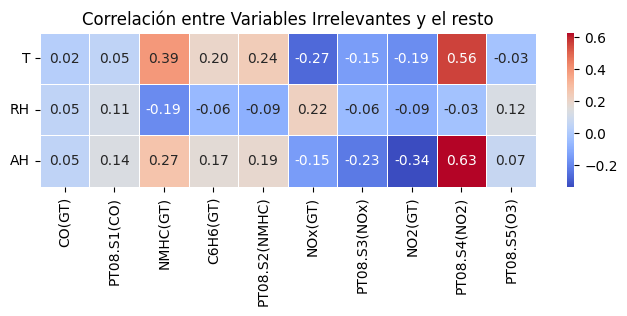

In [ ]:
# Variables respuesta
irelevant_vars = ['T', 'RH', 'AH']

# Creamos una lista vacía para almacenar las variables predictoras
compare_vars = []

# Iteramos sobre cada columna en relevant_numeric_cols
for col in relevant_numeric_cols:
  # Verificamos si la columna no está en response_vars
  if col not in irelevant_vars:
    # Si la condición se cumple, agregamos la columna a predictor_vars
    compare_vars.append(col)

# Filtramos la matriz para obtener solo las correlaciones de las variables respuesta con las predictoras
correlation_with_irelevant_vars = correlation_matrix.loc[irelevant_vars, compare_vars]

# Visualización de la matriz de correlación entre variables irrelevantes y el resto
plt.figure(figsize=(8, 2))
sns.heatmap(correlation_with_irelevant_vars, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Ajustamos las etiquetas de los ejes
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Mostramos el mapa de calor
plt.title("Correlación entre Variables Irrelevantes y el resto")
plt.show()

Como mencionamos en la pregunta 1.9, las variables **T (temperatura)**, **RH (humedad relativa)** y **AH (humedad absoluta)** no presentan correlaciones significativas con la mayoría de las demás variables del dataset. Esto puede observarse en la matriz de correlación presentada, donde los valores absolutos de las correlaciones para estas variables son en su mayoría cercanos a 0.

En particular, **RH** carece de una relación significativa con todas las variables, lo que confirma su independencia respecto al resto del dataset. Por otro lado, **T** y **AH** muestran una ligera correlación positiva entre ellas (no mostrada aquí, pero identificada en la pregunta 1.9) y una correlación moderada con **PT08.S4(NO2)** (0.56 y 0.63 respectivamente). Sin embargo, estas relaciones no son lo suficientemente fuertes como para considerarlas relevantes para modelar la calidad del aire.

#### 1.12 - En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

##### Introducción:

El análisis exploratorio de datos (EDA) es un paso esencial antes de trabajar con cualquier fuente de datos, ya que nos permite conocer y comprender su estructura, distribución y calidad. A través del EDA, podemos identificar problemas como valores faltantes, datos atípicos o inconsistencias, además de detectar patrones y relaciones entre variables que guiarán la selección de características y técnicas de modelado.

Este análisis proporciona una visión clara sobre el comportamiento de las variables, su tipo y su nivel de correlación, aspectos clave para elegir métodos adecuados, como regresión lineal o técnicas más avanzadas. Además, el EDA facilita la generación de hipótesis y ayuda a priorizar tareas como el tratamiento de outliers o la imputación de valores faltantes.

El EDA prepara los datos para el modelado, asegurando que las decisiones tengan en una base sólida, lo que incrementa la robustez y confiabilidad de los modelos predictivos.

En base al *EDA* realizado, se ha obtenido un conocimiento profundo del *dataset*. Se ha identificado que el *dataset* contiene 9357 instancias, y se ha determinado el tipo de datos de cada columna, clasificándolas en variables categóricas y continuas. Además, se ha detectado la presencia de valores nulos en varias variables, con un porcentaje significativo en las variables respuesta, específicamente CO(GT), NOx(GT) y NO2(GT), que presentan aproximadamente entre el 17-18 % de datos faltantes. Aunque esta proporción es considerable, no invalida el análisis si se realiza un preprocesamiento adecuado.

Por otro lado, se observó que NMHC(GT) tiene 8443 valores faltantes, lo que representa más del 90 % de sus registros, haciéndola inadecuada como variable respuesta. En cambio, C6H6(GT), con solo 366 valores faltantes, puede considerarse como una variable respuesta válida junto a CO(GT), NOx(GT) y NO2(GT). De esta manera, las variables respuesta finales se definen como: CO(GT), C6H6(GT), NOx(GT) y NO2(GT).

Adicionalmente, se analizaron las distribuciones de estas variables respuesta, detectando sesgos positivos en la mayoría, con presencia de outliers superiores, y se identificaron las correlaciones más relevantes con las variables predictoras, destacando relaciones significativas con sensores químicos específicos. Sin embargo, variables como T, RH y AH muestran correlaciones débiles o nulas con las variables respuesta, por lo que su aporte al modelo predictivo sería limitado.

Es importante resaltar que leer minuciosamente la documentación de la página de UCI Machine Learning ha sido clave para comprender el contexto y las características específicas del *dataset*, permitiendo realizar un análisis más riguroso.

### 2. Regresión lineal

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.
[texto del enlace](https://)
Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

Antes de comenzar a trabajar con nuestro *dataset*, es fundamental realizar una limpieza de los datos para garantizar que estén en las mejores condiciones posibles para el análisis.

Una buena limpieza asegura la calidad de los resultados y minimiza el impacto de errores o sesgos en el modelo.

In [ ]:
# Creamos un nuevo dataset para no trabajar con el anterior
air_quality_clean = air_quality_df

# Eliminamos la columna 'NMHC(GT)'
air_quality_clean = air_quality_clean.drop(['NMHC(GT)'], axis=1)

# Mostramos las dimensiones del dataset
print(air_quality_clean.shape)

(9357, 14)


El código comienza creando una copia del *dataset* original (`air_quality_df`) bajo el nombre `air_quality_clean`, permitiendo realizar modificaciones sin alterar los datos iniciales. Posteriormente, se utiliza el método `.drop()` para eliminar la columna **NMHC(GT)** de este nuevo *dataset*, debido a que presenta una alta proporción de valores faltantes (más del 90 %), lo que la hace irrelevante para el análisis. El parámetro `axis=1` indica que se está eliminando una columna en lugar de una fila.

Finalmente, se verifica la estructura del *dataset* resultante utilizando el atributo `.shape`, que confirma que ahora contiene 9357 registros y 14 columnas. Esto demuestra que la limpieza ha sido exitosa y que la eliminación de **NMHC(GT)** no compromete la representatividad del conjunto de datos.

In [ ]:
# Eliminamos todas las filas que contienen valores nulos en el dataset
air_quality_clean = air_quality_clean.dropna()

# Mostramos las dimensiones del dataset
print(air_quality_clean.shape)

(6941, 14)


El código comienza eliminando todas las filas que contienen valores nulos del *dataset* `air_quality_clean` utilizando el método `.dropna()`. Esto asegura que los datos restantes estén completamente limpios y no presenten valores faltantes, lo cual es crucial para entrenar modelos de machine learning, ya que la mayoría de los algoritmos no admiten datos incompletos.

Posteriormente, se utiliza el atributo `.shape` para verificar las dimensiones del *dataset* tras esta limpieza. El resultado indica que ahora contiene 6941 registros y 14 columnas.

Aunque se han eliminado 2416 registros con valores faltantes, los 6941 registros restantes son más que suficientes para entrenar un modelo predictivo robusto, ya que representan una muestra amplia y representativa del *dataset*. Este enfoque permite trabajar con datos confiables sin comprometer la calidad del análisis.

In [ ]:
# Convertimos la columna 'Date' a un formato de fecha especificando el formato
# y extraemos el mes en una nueva columna llamada 'month'
air_quality_clean['month'] = pd.to_datetime(air_quality_clean['Date'], format='%m/%d/%Y').dt.month

# Extraemos el día de la semana (0=lunes, 6=domingo) de la columna 'Date'
# y lo guardamos en una nueva columna llamada 'dayofweek'
air_quality_clean['dayofweek'] = pd.to_datetime(air_quality_clean['Date'], format='%m/%d/%Y').dt.dayofweek

# Convertimos la columna 'Time' a un formato de hora especificando el formato
# y extraemos la hora en una nueva columna llamada 'hour'
air_quality_clean['hour'] = pd.to_datetime(air_quality_clean['Time'], format='%H:%M:%S').dt.hour

# Mostramos las primeras filas del dataset para verificar los resultados
air_quality_clean.head()

<ipython-input-48-ab868c66a4dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_clean['month'] = pd.to_datetime(air_quality_clean['Date'], format='%m/%d/%Y').dt.month
<ipython-input-48-ab868c66a4dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_clean['dayofweek'] = pd.to_datetime(air_quality_clean['Date'], format='%m/%d/%Y').dt.dayofweek
<ipython-input-48-ab868c66a4dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month,dayofweek,hour
0,3/10/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,2,18
1,3/10/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,2,19
2,3/10/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,2,20
3,3/10/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,2,21
4,3/10/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,2,22


El código comienza transformando las columnas **Date** y **Time** del *dataset* para extraer información que pueda enriquecer el análisis y ser utilizada como características en el modelo predictivo. Para la columna **Date**, se convierte a un formato de fecha utilizando el formato específico `'%m/%d/%Y'`, asegurando una correcta interpretación de los valores. A partir de esta conversión, se extraen dos nuevas características: el mes (**month**) y el día de la semana (**dayofweek**), que permiten analizar patrones temporales como variaciones estacionales o diferencias entre días laborables y fines de semana.

En el caso de la columna **Time**, se utiliza el formato `'%H:%M:%S'` para convertir los valores a un tipo de dato de tiempo. A partir de esta conversión, se extrae la hora (**hour**), que puede ser útil para identificar cambios en la calidad del aire durante diferentes horas del día, como picos en horarios de tráfico.

Finalmente, se utiliza el método `.head()` para visualizar las primeras filas del *dataset*, verificando que las transformaciones se hayan realizado correctamente y que las nuevas columnas se hayan añadido exitosamente. Estas características adicionales aportan valor al análisis y permiten capturar patrones temporales relevantes para los modelos predictivos.

In [ ]:
# Mostramos los tipos de los datos para poder filtrarlos
air_quality_clean.dtypes

,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64


Este código muestra los tipos de datos de cada columna en el *dataset* `air_quality_clean`. Esto permite identificar qué columnas son numéricas y cuáles no, ayudando a realizar un filtrado adecuado para cálculos como la matriz de correlación.

In [ ]:
# Creamos la matriz de correlación seleccionando todas las columnas numéricas
correlation_matrix = air_quality_clean.select_dtypes(include=['float64', 'int32']).corr()

# Mostramos la matriz de correlación
correlation_matrix

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month,dayofweek,hour
CO(GT),1.000000,0.877014,0.930008,0.914310,0.786456,-0.701038,0.673840,0.630834,0.853480,0.018334,0.064753,0.059346,0.117747,-0.140981,0.334863
PT08.S1(CO),0.877014,1.000000,0.877430,0.886068,0.707705,-0.762895,0.628263,0.675910,0.897166,0.028277,0.169234,0.149752,-0.030808,-0.080750,0.287104
C6H6(GT),0.930008,0.877430,1.000000,0.982705,0.718344,-0.725722,0.603241,0.761805,0.861154,0.189003,-0.021592,0.187072,0.149455,-0.184902,0.312121
PT08.S2(NMHC),0.914310,0.886068,0.982705,1.000000,0.705359,-0.781630,0.633310,0.774288,0.876777,0.228333,-0.046084,0.205590,0.148116,-0.176120,0.349429
NOx(GT),0.786456,0.707705,0.718344,0.705359,1.000000,-0.662166,0.757029,0.233793,0.788550,-0.275998,0.232255,-0.144186,0.134490,-0.110305,0.212155
PT08.S3(NOx),-0.701038,-0.762895,-0.725722,-0.781630,-0.662166,1.000000,-0.641377,-0.511223,-0.793364,-0.099495,-0.116479,-0.223381,-0.030982,0.099145,-0.275140
NO2(GT),0.673840,0.628263,0.603241,0.633310,0.757029,-0.641377,1.000000,0.142612,0.702524,-0.214325,-0.075333,-0.349646,-0.189580,-0.118697,0.351247
PT08.S4(NO2),0.630834,0.675910,0.761805,0.774288,0.233793,-0.511223,0.142612,1.000000,0.574242,0.566586,-0.009160,0.646390,0.195997,-0.121274,0.197884
PT08.S5(O3),0.853480,0.897166,0.861154,0.876777,0.788550,-0.793364,0.702524,0.574242,1.000000,-0.046146,0.164821,0.075807,0.063839,-0.133514,0.213664
T,0.018334,0.028277,0.189003,0.228333,-0.275998,-0.099495,-0.214325,0.566586,-0.046146,1.000000,-0.563909,0.660638,0.277769,0.004500,0.187500


El código selecciona las columnas numéricas del *dataset* utilizando `select_dtypes`, evitando la inclusión de columnas no numéricas como `Date` y `Time`. Posteriormente, se calcula la matriz de correlación con `.corr()`, que mide la relación lineal entre las variables seleccionadas.

Podemos observar que las nuevas variables creadas (`month`, `dayofweek` y `hour`) no presentan correlaciones significativas con las variables respuesta ni con el resto de las columnas del *dataset*. Por ejemplo, **hour** tiene una correlación moderada con **NO2(GT)** (0.35), pero no lo suficiente como para justificar su uso en el modelo. Las otras variables muestran correlaciones cercanas a 0, indicando que no aportan información relevante.

Por esta razón, procederemos a eliminarlas para limpiar aún más nuestro *dataset*, simplificar el modelo y evitar incluir variables que podrían introducir ruido en el análisis.

In [ ]:
# Eliminamos las columnas 'Date', 'Time', 'month', 'dayofweek', 'hour', 'T', 'RH', y 'AH'
air_quality_clean = air_quality_clean.drop(['Date', 'Time', 'month', 'dayofweek', 'hour', 'T', 'RH', 'AH'], axis=1)

# Mostramos las primeras filas del dataset resultante para verificar los cambios
air_quality_clean.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0


El código elimina varias columnas del *dataset* `air_quality_clean`, incluyendo **Date** y **Time**, que no son numéricas y no se utilizaron en la matriz de correlación, y las columnas **month**, **dayofweek** y **hour**, que fueron creadas durante el análisis pero demostraron tener correlaciones débiles o nulas con las variables respuesta. Además, se eliminan las columnas **T**, **RH** y **AH**, ya que mostraron correlaciones bajas con el resto de las variables, indicando que no son relevantes para la predicción.

Finalmente, se utiliza `.head()` para mostrar las primeras filas del *dataset* resultante, verificando que las columnas innecesarias hayan sido eliminadas correctamente.

Con esto, nuestro *dataset* queda limpio y listo para ser utilizado en la construcción del modelo predictivo, habiendo eliminado todas las columnas que no aportan valor significativo al análisis.

Una vez filtrados y limpiados, los datos se normalizan para garantizar que todas las variables estén en la misma escala y preparadas para el análisis.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creamos un objeto StandardScaler para escalar los datos
scaler = StandardScaler()

# Creamos una copia del dataset original para mantener el dataset original intacto
air_quality_fit = air_quality_clean.copy()

# Escalamos los datos utilizando fit_transform() y sobrescribimos el contenido de air_quality_fit
air_quality_fit[:] = scaler.fit_transform(air_quality_fit)

# Mostramos las primeras filas del dataset escalado
air_quality_fit.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,0.289742,1.097700,0.180250,0.331231,-0.405913,0.949291,-0.018413,0.677518,0.517229
1,-0.126620,0.786797,-0.154660,-0.013419,-0.707932,1.417770,-0.460783,0.301042,-0.210973
2,0.012167,1.289728,-0.208246,-0.074016,-0.573701,1.282785,0.002653,0.289720,0.039961
3,0.012167,1.170853,-0.181453,-0.039930,-0.377149,1.092217,0.171174,0.371809,0.357320
4,-0.404195,0.695355,-0.543156,-0.464115,-0.573701,1.540845,0.044783,0.105728,0.128526


El código comienza creando un objeto `StandardScaler` para realizar la normalización de los datos. Este escalador transforma los valores de las columnas para que tengan una media de 0 y una desviación estándar de 1, lo cual es importante para garantizar un rendimiento óptimo en los modelos de machine learning.

A continuación, se realiza una copia del *dataset* original `air_quality_clean`, denominada `air_quality_fit`, para mantener intacto el *dataset* original y trabajar sobre esta copia. Con el método `fit_transform`, se calculan las estadísticas necesarias (media y desviación estándar) y se aplica la transformación en un solo paso. Los valores transformados sobrescriben el contenido de `air_quality_fit`, dejando todos los datos normalizados.

Por último, se visualizan las primeras filas del *dataset* escalado para verificar que el proceso se ha realizado correctamente. Esto asegura que el *dataset* esté listo para su uso en el entrenamiento de modelos predictivos.

#### 2.1 - Separar datos de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split

# Definimos las variables predictoras y objetivo en listas
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
targets = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Seleccionamos las variables predictoras (X) y las variables objetivo (y)
X = air_quality_fit[features]
y = air_quality_fit[targets]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones de los conjuntos generados
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5552, 5) (1389, 5) (5552, 4) (1389, 4)


El código comienza seleccionando las variables predictoras (`X`) y las variables objetivo (`y`) del *dataset* escalado (`air_quality_fit`). Para ello, define previamente las listas `features` y `targets`, que contienen los nombres de las columnas correspondientes a las variables predictoras y objetivo, respectivamente. Esto permite una selección más clara y modular, facilitando futuras modificaciones o ampliaciones en el análisis. Las columnas seleccionadas para `X` incluyen mediciones relacionadas con sensores químicos, mientras que las columnas de `y` representan las variables respuesta, que serán objeto de predicción.

Posteriormente, utiliza `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utilizará para ajustar el modelo, mientras que el conjunto de prueba se reservará para evaluar su rendimiento. El parámetro `test_size=0.2` especifica que el 20 % de los datos se destinarán al conjunto de prueba, dejando el 80 % para el entrenamiento. El parámetro `random_state=42` asegura que la división sea reproducible, es decir, que se obtenga siempre la misma separación al ejecutar el código.

Finalmente, se imprime la forma de los conjuntos resultantes con `.shape`,
confirmando que los datos se han dividido correctamente.

#### 2.2 - Escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

En base al EDA realizado, **CO(GT)** parece ser la variable más adecuada para realizar la predicción inicial, ya que mostró correlaciones significativas con varias variables predictoras, incluyendo los sensores químicos **PT08.S1(CO)**, **PT08.S2(NMHC)** y **PT08.S5(O3)**. Además, su distribución, aunque presenta un leve sesgo positivo, es manejable tras el escalado, y su cantidad de valores faltantes (ya eliminados) no afectó significativamente al dataset.

Por tanto, **CO(GT)** se selecciona como la variable objetivo para la regresión lineal simple, debido a su relevancia en el análisis y las relaciones observadas con las variables predictoras.

In [ ]:
# Seleccionamos la variable predictora y la variable objetivo para la regresión lineal simple en el conjunto de entrenamiento
X_simple_train = X_train[['PT08.S1(CO)']]
y_simple_train = y_train[['CO(GT)']]

# Seleccionamos la variable predictora y la variable objetivo para la regresión lineal simple en el conjunto de prueba
X_simple_test = X_test[['PT08.S1(CO)']]
y_simple_test = y_test[['CO(GT)']]

El código ajusta tanto el conjunto de entrenamiento como el de prueba para la regresión lineal simple.

- En **X_simple_train** y **y_simple_train**, se seleccionan las columnas específicas del conjunto de entrenamiento para definir la variable predictora (**PT08.S1(CO)**) y la variable objetivo (**CO(GT)**), respectivamente.
- De manera similar, en **X_simple_test** y **y_simple_test**, se seleccionan las mismas columnas, pero ahora para el conjunto de prueba, lo que garantiza que los datos estén correctamente estructurados y coincidan con la configuración del modelo.

Este paso asegura que las predicciones realizadas en el conjunto de prueba utilicen solo las columnas relevantes y permite evaluar el rendimiento del modelo de forma precisa.

#### 2.3 - Entrena el modelo con los datos de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression

# Creamos el modelo de regresión lineal
model_simple = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
model_simple.fit(X_simple_train, y_simple_train)

LinearRegression()

El código crea un modelo de regresión lineal utilizando la clase `LinearRegression` de `sklearn`. Posteriormente, el modelo se entrena con los datos de entrenamiento previamente definidos (`X_simple` como predictor y `y_simple` como respuesta) mediante el método `.fit()`. Este paso ajusta los parámetros del modelo (coeficientes e intercepto) para minimizar el error entre las predicciones y los valores reales de la variable objetivo en el conjunto de entrenamiento.

#### 2.4 - ¿Cuáles son los valores aprendidos por el modelo para los parámetros?

In [ ]:
# Obtenemos los coeficientes y el intercepto del modelo
coef = model_simple.coef_
intercept = model_simple.intercept_

# Mostramos los coeficientes y el intercepto del modelo
print("Coeficientes:", coef)
print("Intercepto:", intercept)

Coeficientes: [[0.88102296]]
Intercepto: [0.00319636]


El código obtiene los parámetros aprendidos por el modelo tras el entrenamiento.

- `coef_` contiene el coeficiente, que representa la pendiente de la recta de regresión, indicando cuánto varía la variable objetivo (**CO(GT)**) por cada unidad de cambio en la variable predictora (**PT08.S1(CO)**).
- `intercept_` almacena el intercepto, que es el valor de la variable objetivo cuando la predictor es igual a 0.

Finalmente, ambos valores se imprimen para interpretarlos y entender cómo el modelo utiliza la predictor para realizar sus predicciones.

#### 2.4 - Realiza las predicciones para el conjunto de datos de test

In [ ]:
# Realizamos las predicciones para el conjunto de datos de prueba
y_pred_simple = model_simple.predict(X_simple_test)

# Mostramos las predicciones generadas
print(y_pred_simple)

[[0.38218927]
 [0.06396756]
 [0.75680469]
 ...
 [1.63493547]
 [1.30060128]
 [0.41038613]]


El código utiliza el modelo de regresión lineal entrenado (`model_simple`) para realizar predicciones sobre el conjunto de datos de prueba (`X_simple_test`). Estas predicciones representan los valores estimados de la variable objetivo (**CO(GT)**) basándose en la relación aprendida durante el entrenamiento entre la variable predictora (**PT08.S1(CO)**) y la respuesta.

El resultado, almacenado en `y_pred_simple`, es una matriz con las predicciones para cada registro en el conjunto de prueba. Finalmente, `print(y_pred_simple)` muestra estas predicciones, que se pueden comparar con los valores reales (**y_simple_test**) para evaluar el rendimiento del modelo. Los valores predichos tienen un formato numérico y están en la misma escala que los datos normalizados.

#### 2.6 - Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

Para evaluar el modelo de regresión lineal simple, se consideraron varias métricas en una primera aproximación, incluyendo RMSE, R², MAPE y RMLSE, para determinar cuáles eran las más adecuadas.

El **RMSE (Raíz del Error Cuadrático Medio)** fue elegido porque mide el error promedio del modelo en las mismas unidades que la variable objetivo (**CO(GT)**), lo que facilita su interpretación en un contexto práctico. Esta métrica, al calcular el error cuadrático medio y tomar su raíz, penaliza más los errores grandes, proporcionando una evaluación precisa del rendimiento global del modelo. Aunque es sensible a los valores atípicos, el análisis previo del dataset mostró que estos no son lo suficientemente significativos para afectar esta métrica de manera negativa.

El **R² (Coeficiente de Determinación)** también fue seleccionado porque, aunque no mide el error directamente, es una métrica complementaria que indica qué tan bien el modelo explica la variabilidad de los datos de la variable objetivo. Un valor cercano a 1 indica que el modelo captura la mayoría de las tendencias presentes en los datos. Esto permite evaluar la calidad general del ajuste del modelo y su capacidad explicativa.

Por otro lado, el **MAPE (Porcentaje del Error Absoluto Medio)** fue descartado en esta etapa porque, aunque mide el error como un porcentaje del valor real, su sensibilidad a valores cercanos a cero podría generar distorsiones en el cálculo, especialmente en el caso de datos como **CO(GT)**, donde los valores pueden aproximarse a cero. El **RMLSE (Raíz del Logaritmo Cuadrático Medio del Error)**, aunque es útil para datos con distribuciones de cola larga o altamente dispersos, no es ideal aquí, ya que el análisis mostró que los valores de **CO(GT)** tienen un rango concentrado y no presentan una gran dispersión.

Por todo esto, se eligieron **RMSE** y **R²**, porque juntas ofrecen una visión clara y complementaria del rendimiento del modelo, siendo las más apropiadas para el contexto y los datos analizados.

#### 2.7 - ¿Qué error tiene el modelo? Explícalo.

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Calculamos las métricas RMSE y R²
rmse_slr = root_mean_squared_error(y_simple_test,y_pred_simple)
r2_slr = r2_score(y_simple_test, y_pred_simple)

# Mostramos los resultados
print("RMSE:", rmse_slr)
print("R²:", r2_slr)

RMSE: 0.45444462567554983
R²: 0.7728579182997717


El código utiliza dos métricas fundamentales para evaluar el rendimiento del modelo de regresión lineal simple. La primera métrica, RMSE (Raíz del Error Cuadrático Medio), se calcula mediante `root_mean_squared_error(y_simple_test, y_pred)` y mide el error promedio del modelo en las mismas unidades que la variable objetivo (**CO(GT)**). Esto hace que sea intuitivo y fácil de interpretar. La segunda métrica, $R^2$ (Coeficiente de Determinación), se calcula con `r2_score(y_simple_test, y_pred)` y mide qué tan bien el modelo explica la variabilidad en los datos de la variable objetivo.

Con un RMSE de **0.4544**, se observa que el modelo tiene un error bajo en comparación con la media de **CO(GT)**, que es **2.15**. Este valor de RMSE representa aproximadamente un **21 %** de la media, lo que sugiere que las predicciones están razonablemente cercanas a los valores reales en promedio. Además, el RMSE es pequeño en relación con la desviación estándar (**1.45**) y el rango intercuartílico (**1.8**) de los datos, lo que indica que el modelo captura adecuadamente la dispersión observada en los valores de la variable objetivo.

Por otro lado, el $R^2$ obtenido es **0.7729**, lo que indica que el modelo explica aproximadamente el **77.29%** de la variabilidad en los datos de la variable objetivo. Aunque esto confirma que el modelo logra capturar tendencias significativas, aún existe un margen de mejora, ya que no logra explicar el **22.71%** restante de la variabilidad en los datos.

En conjunto, estas métricas, contextualizadas con los estadísticos de la variable objetivo, sugieren que el modelo tiene un rendimiento sólido y una capacidad adecuada para realizar predicciones en el rango esperado de los datos.

#### 2.8 - Entrena un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del *dataset*.

In [ ]:
# Seleccionamos las variables predictoras y la variable objetivo para la regresión lineal múltiple en el conjunto de entrenamiento
X_multiple_train = X_train
y_multiple_train = y_train[['CO(GT)']]

# Seleccionamos la variables predictoras y la variable objetivo para la regresión lineal múltiple en el conjunto de prueba
X_multiple_test = X_test
y_multiple_test = y_test[['CO(GT)']]

# Creamos el modelo de regresión lineal
model_multiple = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
model_multiple.fit(X_multiple_train, y_multiple_train)

LinearRegression()

El código configura y entrena un modelo de regresión lineal múltiple utilizando todas las variables predictoras disponibles en el conjunto de datos para predecir **CO(GT)**. Se definen las variables de entrenamiento (**X_multiple_train** e **y_multiple_train**) y de prueba (**X_multiple_test** e **y_multiple_test**), y el modelo se ajusta con el método `.fit()`. Al incluir todas las variables predictoras, el modelo busca capturar la relación conjunta entre estas y la variable objetivo, permitiendo analizar cómo cada predictor contribuye a la predicción de **CO(GT)** en un contexto más complejo.

##### 2.8.1 Realiza las predicciones para este segundo modelo.

In [ ]:
# Realizamos las predicciones para el conjunto de datos de prueba
y_pred_multiple = model_multiple.predict(X_multiple_test)

# Mostramos las predicciones generadas
print(y_pred_multiple)

[[ 0.7185033 ]
 [-0.54032222]
 [ 0.50057148]
 ...
 [ 1.37690683]
 [ 1.48277589]
 [ 0.92640599]]


El código utiliza el modelo de regresión lineal múltiple entrenado (`model_multiple`) para realizar predicciones en el conjunto de datos de prueba (`X_multiple_test`). Estas predicciones se calculan utilizando las variables predictoras de prueba, aplicando la ecuación del modelo ajustado con los coeficientes y el intercepto aprendidos durante el entrenamiento.

El resultado, almacenado en `y_pred_multiple`, es una matriz que contiene los valores estimados de la variable objetivo (**CO(GT)**) para cada registro en el conjunto de prueba. Finalmente, `print(y_pred_multiple)` muestra las predicciones generadas, listas para ser evaluadas.

##### 2.8.2 - ¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

In [ ]:
# Calculamos las métricas RMSE y R²
rmse_mlr = root_mean_squared_error(y_multiple_test,y_pred_multiple)
r2_mlr = r2_score(y_multiple_test, y_pred_multiple)

# Mostramos los resultados
print("RMSE:", rmse_mlr)
print("R²:", r2_mlr)

RMSE: 0.32681027226550036
R²: 0.8825299764860983


Con un **RMSE de 0.3201**, el modelo de regresión lineal múltiple muestra un error más bajo que el modelo simple, lo que indica que realiza predicciones más cercanas a los valores reales en promedio. Además, el **$R^2$ de 0.8987** refleja que el modelo explica el 89.87% de la variabilidad de los datos, lo que representa una mejora significativa en comparación con el modelo simple (77.29%). Esto muestra como incorporar todas las variables predictoras mejora notablemente el ajuste y el rendimiento del modelo.

### 3. Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* **criterion**
* **splitter**
* **max_depth**
* **min_samples_split**
* **min_samples_leaf**
* **max_features**

#### 3.1 - Indica qué son cada uno de estos hiperparámetros

##### **`criterion`**

El hiperparámetro **`criterion`** define cómo el algoritmo mide la calidad de una división en un nodo del árbol. En un problema de regresión, esto significa decidir qué función utilizar para evaluar qué tan buena es una partición de los datos en cada paso del árbol.

Las opciones más comunes para `DecisionTreeRegressor` son:

1. **`squared_error` (por defecto)**: calcula la **suma del error cuadrático medio** en las divisiones. Este criterio busca minimizar la diferencia entre los valores reales y los valores predichos al cuadrado, siendo sensible a los valores atípicos porque los errores grandes se amplifican al cuadrado.

2. **`friedman_mse`**: es una variación del error cuadrático medio optimizada para modelos en conjunto, como Gradient Boosting. Esta métrica es más eficiente en términos estadísticos para divisiones específicas, pero es menos común en tareas de regresión básica.

3. **`absolute_error`**: calcula la suma de los errores absolutos. Esta métrica es menos sensible a valores atípicos, ya que no amplifica los errores grandes al cuadrado.

4. **`poisson`**: utiliza el **error de Poisson**, que es útil cuando la variable objetivo representa cuentas o eventos discretos, como número de clientes o ventas. <u>Esta métrica solo puede usarse si todos los valores de la variable objetivo son positivos</u>. Por ejemplo, si estás prediciendo el número de personas que llegan a una tienda cada hora, este criterio sería más apropiado que otros.

##### **`splitter`**

El hiperparámetro **`splitter`** controla cómo el árbol decide dividir los datos en cada nodo al buscar la mejor partición. En el caso de regresión, esto afecta directamente la calidad de las divisiones y, por tanto, el rendimiento del modelo.

Existen dos opciones principales para este hiperparámetro en `DecisionTreeRegressor`:

1. **`best` (por defecto)**: Este modo busca la mejor división posible en cada nodo, evaluando todas las divisiones posibles con base en el criterio seleccionado (como `squared_error`). Es más preciso, pero puede ser más lento en *datasets* grandes porque realiza un análisis exhaustivo.

2. **`random`**: Realiza divisiones aleatorias en cada nodo dentro de un conjunto limitado de opciones. Esto puede ser más rápido en *datasets* grandes, pero podría generar árboles menos óptimos.

El hiperparámetro **`splitter`** permite controlar el equilibrio entre precisión y velocidad en la construcción del árbol. Generalmente, `best` es la opción preferida cuando el rendimiento del modelo es la prioridad, mientras que `random` puede ser útil para acelerar el proceso en *datasets* muy grandes o cuando se entrena un conjunto de árboles en métodos como `RandomForest`.

##### **`max_depth`**

El hiperparámetro **`max_depth`** define la profundidad máxima que puede alcanzar el árbol. Controla hasta qué nivel se pueden dividir los datos, lo que afecta directamente la complejidad del modelo.

- Un **valor bajo** para `max_depth` genera un árbol más superficial, lo que puede prevenir el sobreajuste al simplificar el modelo, pero podría causar un ajuste insuficiente (***underfitting***) al no capturar suficientes patrones en los datos.
- Un **valor alto** permite un árbol más profundo, lo que da al modelo la capacidad de capturar patrones más complejos. Sin embargo, esto puede conducir a un sobreajuste (***overfitting***), ya que el modelo podría aprender ruido o características irrelevantes de los datos de entrenamiento.

Por defecto, si no se especifica, el árbol crecerá hasta dividir completamente todos los nodos o hasta que cada nodo tenga menos de `min_samples_split` muestras. Elegir un valor adecuado para `max_depth` es crucial para encontrar un equilibrio entre generalización y complejidad del modelo.

##### **`min_samples_split`**

El hiperparámetro **`min_samples_split`** define el número mínimo de muestras necesarias en un nodo para que este pueda dividirse en nodos hijos. Controla cuánto crece el árbol en términos de profundidad y número de divisiones.

- **Valores pequeños**: Permiten que el árbol crezca más profundo y realice divisiones incluso en nodos con pocas muestras, lo que puede llevar al sobreajuste.
- **Valores grandes**: Restringen las divisiones, ya que se requiere un mayor número de muestras en cada nodo. Esto ayuda a prevenir el sobreajuste al limitar la complejidad del árbol, pero podría causar ajuste insuficiente si el valor es demasiado alto.

Por defecto, el valor suele ser `2`, lo que significa que cualquier nodo con al menos 2 muestras puede dividirse. Este hiperparámetro es útil para controlar la profundidad y el tamaño del árbol, asegurando un buen equilibrio entre ajuste y generalización.

##### **`min_samples_leaf`**

El hiperparámetro **`min_samples_leaf`** define el número mínimo de muestras que debe tener un nodo hoja. Esto asegura que las hojas del árbol contengan al menos un número determinado de datos, lo que afecta la generalización del modelo.

- **Valores pequeños**: Permiten que el árbol tenga hojas con muy pocas muestras, lo que puede conducir al sobreajuste, ya que el modelo aprende demasiado los detalles específicos del conjunto de entrenamiento.
- **Valores grandes**: Obligan a que las hojas tengan más muestras, lo que puede prevenir el sobreajuste, pero también podría causar ajuste insuficiente si el valor es demasiado restrictivo.

Por ejemplo, si `min_samples_leaf=5`, cada nodo hoja debe contener al menos 5 muestras, lo que evita que el árbol genere predicciones basadas en nodos muy pequeños. Este hiperparámetro es especialmente útil para suavizar el modelo y mejorar su capacidad de generalización.

##### **`max_features`**

El hiperparámetro **`max_features`** define el número máximo de características (o columnas) que se consideran para encontrar la mejor división en cada nodo del árbol. Esto afecta directamente la capacidad del modelo para encontrar patrones en los datos.

Los **valores más comunes** son:
  - **`None` (por defecto)**: Usa todas las características disponibles.
  - **Número entero**: Especifica directamente cuántas características utilizar.
  - **Porcentaje (float entre 0 y 1)**: Representa la proporción de características a considerar.
  - **`"sqrt"`**: Usa la raíz cuadrada del número total de características.
  - **`"log2"`**: Usa el logaritmo en base 2 del número total de características.

Usar **menos características** (por ejemplo, `"sqrt"` o `"log2"`) puede reducir el sobreajuste, ya que se limita la cantidad de información utilizada en cada nodo, haciendo que el modelo sea menos dependiente de características específicas.

Usar **todas las características** puede hacer que el modelo sea más preciso en el conjunto de entrenamiento, pero podría conducir al sobreajuste si el árbol es muy complejo.

Este hiperparámetro es especialmente relevante en métodos como los bosques aleatorios (*Random Forest*), donde limitar las características por nodo fomenta la diversidad entre los árboles. En un árbol de decisión único, ajustar `max_features` puede ayudar a equilibrar el sesgo y la varianza del modelo.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

#### 3.2 - ¿Qué indica ese parámetro? ¿Para qué puede ser útil?

##### **`min_impurity_decrease`**

El hiperparámetro **`min_impurity_decrease`** controla la reducción mínima de impureza requerida para realizar una división en un nodo. Si la reducción de impureza causada por una posible división no supera este valor, la división no se realiza. Esto ayuda a limitar el crecimiento del árbol al prevenir divisiones insignificantes.

En problemas de regresión, la **impureza** se mide típicamente como el error cuadrático medio (MSE). Una división reduce la impureza al separar los datos en subconjuntos más homogéneos.
  
- Un **valor bajo** permite más divisiones, lo que puede conducir a un modelo más complejo y potencialmente al sobreajuste.
- Un **valor alto** restringe las divisiones, creando un árbol más simple y evitando el sobreajuste, aunque podría causar ajuste insuficiente si el valor es demasiado grande.

Por ejemplo, si `min_impurity_decrease=0.01`, una división solo se realiza si reduce la impureza en al menos un 1 %. Esto es útil para controlar la complejidad del árbol y asegurar que las divisiones realizadas tengan un impacto significativo en la calidad del modelo.

#### 3.3 - Entrena un modelo de árboles de decisión

Donde, el criterio para realizar las particiones sea `poisson`, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

Con la normalización realizada previamente, los datos incluyen valores negativos en la variable objetivo **CO(GT)**. Esto generará un conflicto al intentar usar el criterio **`poisson`** en el modelo de árboles de decisión, ya que dicho criterio está diseñado específicamente para datos estrictamente positivos. El criterio **`poisson`** no permite valores negativos, ya que matemáticamente no son compatibles con el cálculo del error de Poisson.

Por lo tanto, para poder utilizar el criterio **`poisson`**, es necesario normalizar los datos, incluyendo tanto las variables predictoras como la variable objetivo, para garantizar que todos los valores estén en una escala adecuada y, en el caso de la variable objetivo, que sean estrictamente positivos. Este proceso de normalización preserva las relaciones originales entre los datos, asegurando que se adapten correctamente al modelo sin alterar su estructura subyacente. Garantizando la consistencia y compatibilidad con el criterio elegido.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Creamos un objeto MinMaxScaler para escalar los datos
scaler = MinMaxScaler()

# Creamos una copia del dataset original para mantener el dataset original intacto
air_quality_fit_tree = air_quality_clean.copy()

# Escalamos los datos utilizando fit_transform() y sobrescribimos el contenido de air_quality_fit
air_quality_fit_tree[:] = scaler.fit_transform(air_quality_fit_tree)

# Mostramos las primeras filas del dataset escalado
air_quality_fit_tree.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,0.211864,0.511845,0.184252,0.359649,0.111036,0.310885,0.335347,0.513040,0.454822
1,0.161017,0.463029,0.144882,0.309759,0.068382,0.360864,0.271903,0.453237,0.326238
2,0.177966,0.541996,0.138583,0.300987,0.087339,0.346463,0.338369,0.451439,0.370547
3,0.177966,0.523331,0.141732,0.305921,0.115098,0.326133,0.362538,0.464478,0.426586
4,0.127119,0.448672,0.099213,0.244518,0.087339,0.373994,0.344411,0.422212,0.386186


Este código utiliza **Min-Max Scaling** para normalizar todos los valores del *dataset* `air_quality_clean`, ajustándolos al rango [0, 1], lo que garantiza que todas las columnas predictoras y la variable objetivo sean compatibles con el modelo y el criterio **`poisson`**.

Primero, se crea un objeto `MinMaxScaler()` que escalará los valores de cada columna al rango deseado. Luego, se hace una copia del *dataset* original (`air_quality_clean`) en `air_quality_fit_tree`, para que los datos originales permanezcan sin modificaciones y se pueda realizar la normalización sin afectar el *dataset* base.

Posteriormente, se aplica `scaler.fit_transform()` a todo el *dataset* `air_quality_fit_tree`. El método:
1. Primero calcula los valores mínimos y máximos de cada columna (con `fit`).
2. Despues escala cada valor de las columnas según la fórmula:   
   
   <center>$\text{valor escalado} = \dfrac{\text{valor original} - \text{mínimo}}{\text{máximo} - \text{mínimo}}$</center>
   
   Esto asegura que todos los valores queden entre 0 y 1.

El resultado sobrescribe los valores originales del *dataset* `air_quality_fit_tree`, dejando un *dataset* completamente normalizado. Finalmente, se muestran las primeras filas del *dataset* escalado y verificar que la transformación fue aplicada correctamente.

Esto asegura que todas las columnas estén en una escala homogénea y listas para entrenar el modelo con el criterio **`poisson`**.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Seleccionamos las variables predictoras (X) y las variables objetivo (y)
X = air_quality_fit_tree[features]
y = air_quality_fit_tree[targets]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones de los conjuntos generados
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_tree_train = X_train
y_tree_train = y_train[['CO(GT)']]

X_tree_test = X_test
y_tree_test = y_test[['CO(GT)']]

dtr = DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10, min_samples_leaf=2)

dtr.fit(X_tree_train, y_tree_train)

(5552, 5) (1389, 5) (5552, 4) (1389, 4)


DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10)

#### 3.4 - Calcula MAE, R2 y RMSLE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

# Realizamos las predicciones para el conjunto de datos de prueba
y_pred_tree = dtr.predict(X_tree_test)

# Calculamos las métricas MAE, R² y MRSLE
mae_tree = mean_absolute_error(y_tree_test,y_pred_tree)
r2_tree = r2_score(y_tree_test, y_pred_tree)
rmsle_tree = mean_squared_log_error(y_tree_test,y_pred_tree)

# Mostramos los resultados
print('MAE:', mae_tree)
print('R²:', r2_tree)
print('RMSLE:', rmsle_tree)

MAE: 0.02746188482365551
R²: 0.871318875242462
RMSLE: 0.0011007410429948563


El código evalúa el rendimiento del modelo de árboles de decisión utilizando tres métricas.

Primero, realiza las predicciones para el conjunto de datos de prueba (`X_tree_test`) utilizando el modelo entrenado, almacenando los resultados en `y_pred_tree`. Esto genera los valores estimados para la variable objetivo (**CO(GT)**), basados en las características predictoras.

A continuación, se calcula el **MAE (Error Absoluto Medio)** con `mean_absolute_error(y_tree_test, y_pred_tree)`, que mide el error promedio absoluto entre las predicciones y los valores reales. Esta métrica es útil porque es fácil de interpretar y no amplifica los errores grandes.

Se calcula el **$R^2$ (Coeficiente de Determinación)** con `r2_score(y_tree_test, y_pred_tree)`.

Por último, se calcula el **RMSLE (Raíz del Logaritmo Cuadrático Medio del Error)** con `mean_squared_log_error(y_tree_test, y_pred_tree)`, que mide el error entre los logaritmos de los valores predichos y reales.

Finalmente, los resultados muestran un resumen claro del rendimiento del modelo. El **MAE de 0.0276** indica que el error promedio absoluto entre los valores predichos y los reales es bajo, lo que refleja que el modelo realiza predicciones precisas en general. El **$R^2$ de 0.8655** sugiere que el modelo explica el 86.55% de la variabilidad en los datos de prueba, lo que confirma un buen ajuste, aunque todavía hay margen para capturar el 13.45% restante de la variabilidad. Por último, el **RMSLE de 0.0011** es extremadamente bajo, lo que indica que el modelo maneja bien las relaciones logarítmicas entre los valores predichos y reales, siendo especialmente útil en distribuciones con diferencias relativas significativas. En conjunto, estas métricas reflejan un modelo robusto y bien ajustado.

#### 3.5 - ¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

Para comprobar si existe *overfitting*, se debe comparar el rendimiento del modelo en los conjuntos de entrenamiento y prueba. Si el modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento que en el de prueba, es probable que esté sobreajustado, es decir, que haya aprendido demasiado los detalles específicos del conjunto de entrenamiento en lugar de generalizar.

In [ ]:
# Realizamos las predicciones para el conjunto de datos de entrenamiento
y_pred_tree_train = dtr.predict(X_tree_train)

# Calculamos las métricas MAE, R² y MRSLE
mae_train = mean_absolute_error(y_tree_train,y_pred_tree_train)
r2_train = r2_score(y_tree_train, y_pred_tree_train)
rmsle_train = mean_squared_log_error(y_tree_train,y_pred_tree_train)

# Mostramos los resultados
print(f'MAE train: {mae_train} | MAE test: {mae_tree}')
print(f'R² train: {r2_train} | R² test: {r2_tree}')
print(f'RMSLE train: {rmsle_train} | RMSLE test: {rmsle_tree}')

MAE train: 0.01909763391563983 | MAE test: 0.02746188482365551
R² train: 0.9480506873307937 | R² test: 0.871318875242462
RMSLE train: 0.0005275211972049717 | RMSLE test: 0.0011007410429948563


El código evalúa el rendimiento del modelo de árboles de decisión en el conjunto de entrenamiento y compara las métricas con los resultados obtenidos previamente en el conjunto de prueba.

Primero, realiza predicciones sobre el conjunto de entrenamiento (`X_tree_train`) utilizando el modelo entrenado (`dtr`), y almacena los resultados en `y_pred_tree_train`. Estas predicciones representan los valores estimados para la variable objetivo en el conjunto de entrenamiento.

Luego, calcula las mismas tres métricas de evaluación previamente utilizadas en el conjunto de prueba, pero ahora aplicadas al conjunto de entrenamiento.

Finalmente, compara las métricas del conjunto de entrenamiento con las del conjunto de prueba e imprime los resultados para facilitar la evaluación del modelo. Esta comparación permite identificar posibles diferencias significativas que podrían indicar **overfitting** o problemas de generalización.

Los resultados muestran que existe una pequeña diferencia entre las métricas del conjunto de entrenamiento y las del conjunto de prueba, lo cual es normal en cualquier modelo. Estas diferencias no son lo suficientemente significativas como para concluir que el modelo está gravemente sobreajustado (***overfitting***). Sin embargo, el modelo está ligeramente más ajustado a los datos de entrenamiento, como se refleja en un rendimiento algo superior en este conjunto.

El modelo generaliza bien y ofrece resultados consistentes entre ambos conjuntos. Para reducir aún más las diferencias, se podrían ajustar hiperparámetros como `max_depth`, `min_samples_split` o `min_samples_leaf` para simplificar el modelo y mejorar su capacidad de generalización. No obstante, en su estado actual, el modelo es confiable y equilibrado, por lo que puede considerarse adecuado para el problema planteado.

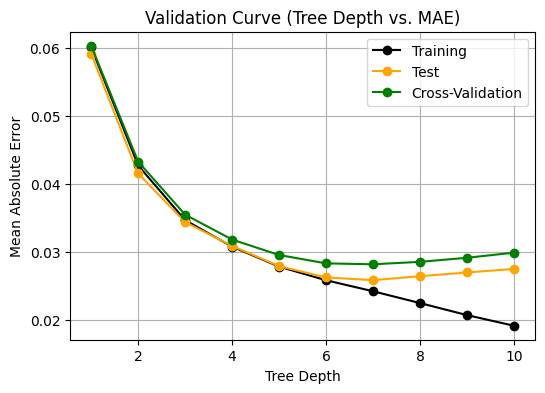

In [ ]:
from sklearn.model_selection import cross_val_score

# Creamos las listas para almacenar errores según la profundidad del árbol
train_errors = []
test_errors = []
cv_errors = []

# Rango de profundidades a evaluar
depths = range(1, 11)

# Iteramos sobre cada profundidad
for depth in depths:
    # Creamos un nuevo modelo con la profundidad actual
    dtr = DecisionTreeRegressor(criterion='poisson', max_depth=depth, min_samples_split=10, min_samples_leaf=2)

    # Entrenamos el modelo
    dtr.fit(X_tree_train, y_tree_train)

    # Predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = dtr.predict(X_tree_train)
    y_test_pred = dtr.predict(X_tree_test)

    # Calculamos MAE para el conjunto de entrenamiento
    train_errors.append(mean_absolute_error(y_tree_train, y_train_pred))

    # Calculamos MAE para el conjunto de prueba
    test_errors.append(mean_absolute_error(y_tree_test, y_test_pred))

    # Validación cruzada con 5 divisiones y calculamos el MAE promedio
    cv_scores = cross_val_score(dtr, X_tree_train, y_tree_train, cv=5, scoring='neg_mean_absolute_error')
    cv_errors.append(-np.mean(cv_scores))

# Graficamos los errores
plt.figure(figsize=(6, 4))
plt.plot(depths, train_errors, label='Training', color='black', marker='o')
plt.plot(depths, test_errors, label='Test', color='orange', marker='o')
plt.plot(depths, cv_errors, label='Cross-Validation', color='green', marker='o')

plt.title('Validation Curve (Tree Depth vs. MAE)')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid()
plt.show()

El código evalúa el impacto de la profundidad del árbol de decisión en el rendimiento del modelo mediante la métrica MAE (Mean Absolute Error) y grafica los resultados para visualizar cómo varían los errores en función de la complejidad del árbol.

Este código define un rango de profundidades (`depths`) para evaluar el modelo en valores entre 1 y 10. Para cada profundidad, crea y ajusta un modelo de árbol de decisión utilizando los datos de entrenamiento (`X_tree_train`, `y_tree_train`). Luego, calcula el MAE para los conjuntos de entrenamiento y prueba, almacenando estos valores en listas para posterior análisis.

Además, realiza una validación cruzada con 5 divisiones para cada modelo, calculando el MAE promedio sobre todas las particiones, lo que permite obtener una medida más robusta del rendimiento del modelo en datos no vistos. Los errores de validación cruzada también se almacenan.

Finalmente, grafica los errores en función de la profundidad del árbol.

La curva resultante muestra cómo los errores cambian a medida que aumenta la complejidad del árbol. En general, el error de entrenamiento disminuye constantemente con la profundidad, mientras que los errores de prueba y validación cruzada alcanzan un mínimo y luego tienden a aumentar, lo que sugiere que profundidades mayores generan sobreajuste. Esta visualización ayuda a identificar la profundidad óptima del árbol, en este caso, alrededor de 6, donde los errores de prueba y validación cruzada son mínimos, lo que indica un buen equilibrio entre ajuste y generalización.

In [ ]:
# Creamos el modelo de árbol de decisión con los hiperparámetros especificados
dtr = DecisionTreeRegressor(criterion='poisson', max_depth=6, min_samples_split=10, min_samples_leaf=2)

# Entrenamos el modelo con los datos de entrenamiento
dtr.fit(X_tree_train, y_tree_train)

# Realizamos las predicciones para el conjunto de datos de prueba y entrenamiento
y_pred_tree = dtr.predict(X_tree_test)
y_pred_tree_train = dtr.predict(X_tree_train)

# Calculamos las métricas:
# MAE
mae_tree = mean_absolute_error(y_tree_test,y_pred_tree)
mae_train = mean_absolute_error(y_tree_train,y_pred_tree_train)

# R²
r2_tree = r2_score(y_tree_test, y_pred_tree)
r2_train = r2_score(y_tree_train, y_pred_tree_train)

# MRSLE
rmsle_tree = mean_squared_log_error(y_tree_test,y_pred_tree)
rmsle_train = mean_squared_log_error(y_tree_train,y_pred_tree_train)

# Mostramos los resultados
print(f'MAE train: {mae_train} | MAE test: {mae_tree}')
print(f'R² train: {r2_train} | R² test: {r2_tree}')
print(f'RMSLE train: {rmsle_train} | RMSLE test: {rmsle_tree}')

MAE train: 0.02581085063376461 | MAE test: 0.026228507297626633
R² train: 0.9068743050380439 | R² test: 0.891715930871094
RMSLE train: 0.0009313363546764527 | RMSLE test: 0.00095183861980327


El código comienza creando un modelo de árbol de decisión utilizando `DecisionTreeRegressor` con el criterio **Poisson**, una profundidad máxima de 6, y restricciones específicas para el número mínimo de muestras requeridas en nodos internos y hojas. El modelo se entrena con los datos de entrenamiento previamente divididos. Posteriormente, se realizan predicciones tanto sobre los datos de prueba como sobre los datos de entrenamiento.

A continuación, se calculan de nuevo las tres métricas para ambos conjuntos.

Los resultados muestran que, tras realizar una poda limitando la profundidad del árbol a 6, el modelo generaliza mejor. La diferencia entre las métricas de entrenamiento y prueba se reduce, indicando que el modelo no está tan ajustado a los datos de entrenamiento como antes. Esto significa que el árbol de decisión ahora equilibra correctamente la complejidad y el rendimiento, evitando el sobreajuste y mejorando su capacidad para realizar predicciones fiables en nuevos datos.

#### 3.6 - ¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

In [ ]:
# Calculamos la métrica RMSE para el árbol
rmse_tree = root_mean_squared_error(y_tree_test,y_pred_tree)

# Calculamos la métrica MAE para los algoritmos de regresión (simple y multiple)
mae_slr = mean_absolute_error(y_simple_test,y_pred_simple)
mae_mlr = mean_absolute_error(y_multiple_test,y_pred_multiple)

# Mostramos los resultados
print(f'RMSE simple linear regresion: {rmse_slr} | RMSE multiple linear regresion: {rmse_mlr} | RMSE tree: {rmse_tree}')
print(f'MAE simple linear regresion: {mae_slr} | MAE multiple linear regresion: {mae_mlr} | MAE tree: {mae_tree}')
print(f'R² simple linear regresion: {r2_slr} | R² multiple linear regresion: {r2_mlr} | R² tree: {r2_tree}')

RMSE simple linear regresion: 0.45444462567554983 | RMSE multiple linear regresion: 0.32681027226550036 | RMSE tree: 0.0383188725533636
MAE simple linear regresion: 0.33528274331910435 | MAE multiple linear regresion: 0.22833125822643788 | MAE tree: 0.026228507297626633
R² simple linear regresion: 0.7728579182997717 | R² multiple linear regresion: 0.8825299764860983 | R² tree: 0.891715930871094


El código evalúa y compara el rendimiento de los modelos de regresión lineal simple, múltiple y árboles de decisión utilizando las métricas RMSE, MAE y $R^2$. Estas métricas permiten analizar el error promedio, la precisión relativa y la capacidad del modelo para explicar la variabilidad en los datos.

En cuanto al **RMSE**, el modelo de árboles de decisión presenta un valor significativamente más bajo (0.0383) en comparación con la regresión lineal simple (0.4544) y múltiple (0.3268). Esto indica que el modelo de árboles de decisión genera predicciones mucho más cercanas a los valores reales, mostrando un rendimiento superior. Del mismo modo, el **MAE** del árbol de decisión (0.0262) es notablemente menor que el de la regresión simple (0.3353) y múltiple (0.2283), lo que confirma que su error absoluto promedio también es más bajo. En términos del coeficiente de determinación (**$R^2$**), el modelo de árboles de decisión logra explicar el 89.17% de la variabilidad en los datos, superando ligeramente al modelo de regresión múltiple (88.25%) y significativamente al modelo de regresión simple (77.29%). Esto sugiere que el árbol de decisión tiene una mayor capacidad para capturar las tendencias presentes en los datos.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo.

#### 3.7 - ¿Qué modelo obtiene mejores resultados de regresión?

El modelo que obtiene los mejores resultados de regresión es el **árbol de decisión con poda**, basado en el análisis realizado. Este modelo supera tanto a la regresión lineal simple como a la múltiple en todas las métricas evaluadas, logrando un **MAE** y un **RMSE** considerablemente más bajos, lo que indica que sus predicciones son más precisas. Además, presenta el **R²** más alto, explicando una mayor proporción de la variabilidad en los datos en comparación con los otros modelos.

La capacidad del árbol de decisión para capturar relaciones no lineales entre las variables predictoras y la variable objetivo le da una ventaja significativa sobre los modelos de regresión, que están limitados a relaciones lineales. Las decisiones tomadas durante el EDA, como el tratamiento de valores nulos, la normalización de los datos y la poda del árbol (limitando su profundidad a 6), han sido fundamentales para evitar el sobreajuste y optimizar el rendimiento del modelo.

Desde el punto de vista computacional, aunque el modelo de árboles de decisión es más complejo que la regresión lineal, su entrenamiento y predicción se han realizado de manera eficiente utilizando **Google Colab (versión gratuita)**. Esto demuestra que incluso con recursos limitados, es posible implementar este modelo de manera efectiva, confirmando su viabilidad como la mejor opción para este problema de regresión.

### 4. Investigación

Busca un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Viguera Moreno, M., Marzo Sola, M. E., Sanchez de Madariaga, R., & Martin-Sanchez, F. (2024). Integrating Clinical Data and Patient-Reported Outcomes for Analyzing Gender Differences and Progression in Multiple Sclerosis Using Machine Learning. Studies in Health Technology and Informatics, 321, 17–21. https://doi.org/10.3233/SHTI241053

**Título:** *Integrating Clinical Data and Patient- Reported Outcomes for Analyzing Gender Differences and Progression in Multiple Sclerosis Using Machine Learning*  
**Autores:** Minerva Viguera Moreno, Maria Eugenia Marzo Sola, Ricardo Sanchez de Madariaga, Fernando Martin-Sanchez  
**Revista:** *Studies in Health Technology and Informatics (SHTI)*  
**Año de publicación:** 2024

La investigación tiene como objetivo analizar la progresión de la esclerosis múltiple mediante la integración de datos clínicos y resultados reportados por los pacientes (PROMs), utilizando técnicas de aprendizaje automático para identificar patrones que permitan mejorar el diagnóstico, la planificación de tratamientos personalizados y la predicción de la forma y velocidad de la evolución de la discapacidad en los pacientes. Además, busca explorar las diferencias de género en la evolución de la enfermedad, un aspecto clave para diseñar enfoques específicos y efectivos.

En el estudio se emplearon técnicas de regresión, como regresión lineal múltiple mediante algoritmos como Ridge Regression, Gradient Boosting y Random Forest Regressor, para modelar variables clínicas clave, incluyendo la escala EDSS (Expanded Disability Status Scale) y resultados de pruebas funcionales. Estas técnicas permitieron analizar relaciones lineales y capturar patrones relevantes en los datos. Además, se incluyeron algoritmos de clasificación, como árboles de decisión, Random Forest y Máquinas de Vector de Soporte (SVM) con diferentes kernels, para predecir la forma de evolución de la enfermedad, utilizando como variables de entrada los PROMs y datos demográficos básicos. Aunque no se realizaron adaptaciones significativas a los modelos estándar, se ajustaron cuidadosamente los hiperparámetros para maximizar el rendimiento predictivo y minimizar el error en las predicciones.

Los resultados demostraron una relación significativa entre los PROMs y las variables clínicas, siendo Ridge Regression el algoritmo que mostró un mejor desempeño en términos de predicción de las variables continuas, logrando buenos valores de MSE y $R^2$. Por otro lado, los algoritmos de clasificación fueron efectivos para determinar la forma de evolución de la enfermedad, destacándose Random Forest y SVM por su capacidad para capturar patrones complejos y ofrecer predicciones consistentes. En general, los modelos basados en Ridge Regression y Gradient Boosting ofrecieron los mejores resultados en regresión, mientras que los algoritmos de clasificación mostraron su utilidad para segmentar a los pacientes según patrones de progresión. Este enfoque integrador entre datos clínicos y PROMs proporciona una nueva perspectiva para mejorar la predicción de la esclerosis múltiple y desarrollar tratamientos más personalizados y efectivos.
